<a href="https://colab.research.google.com/github/mezlet/PPI-Inhibitors/blob/main/code/GNN_based_pipeline_Training_for_Predicting_small_molecule_inhibition_of_protein_complexes_ipynb_end_to_end_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set the Runtime->Change Runtime Type to GPU**

# Protein 3d structure assessment with graph neural networks

In [1]:
!fusermount -u /content/drive
!rm -rf /content/drive
%cd /content


fusermount: failed to unmount /content/drive: No such file or directory
/content


In [2]:
#!rm -r Data
!rm -r PPI-Inhibitors
!git clone https://github.com/adibayaseen/PPI-Inhibitors
#!pip install py3Dmol

rm: cannot remove 'PPI-Inhibitors': No such file or directory
Cloning into 'PPI-Inhibitors'...
remote: Enumerating objects: 1341, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 1341 (delta 76), reused 34 (delta 34), pack-reused 1256 (from 3)
Receiving objects: 100% (1341/1341), 2.59 GiB | 50.15 MiB/s, done.
Resolving deltas: 100% (401/401), done.
Updating files: 100% (605/605), done.


In [3]:
!pip install --upgrade pip setuptools wheel
!pip install rdkit biopython==1.81 torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 torch-geometric==2.5.3 tqdm==4.66.2 pandas==2.1.4 numpy==1.26.4 scikit-learn==1.3.2 matplotlib==3.8.3 seaborn==0.13.2 networkx==3.2.1 gdown


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 47.0 MB/s  0:00:10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 47.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 90.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 175.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 126.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 47.2 MB/s  0:00:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 137.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 91.2 MB/s  0:00:00
   ━━━━━━━━━━━━

In [1]:
%cd PPI-Inhibitors
!mkdir -p Data

%cd Data
!wget -q https://github.com/adibayaseen/PPI-Inhibitors/raw/01ad4975fb9133825b1bf9e71b64fcdaaa5e4d8b/Data/2p2iComplexPairs.txt
!wget -q https://github.com/adibayaseen/PPI-Inhibitors/raw/01ad4975fb9133825b1bf9e71b64fcdaaa5e4d8b/Data/2p2iInhibitorsSMILES.txt
!wget -q https://github.com/adibayaseen/PPI-Inhibitors/raw/2d6bd03422602ec19147870c487e64018b52660f/Data/WriteAllexamplesRandomBindersIdsAll_24JAN_Binary.txt
!wget -q https://github.com/adibayaseen/PPI-Inhibitors/raw/b1e45884f61f792399abad2e4492f48083ab1093/Data/BindersWithComplexname.csv
%cd ..

/content/PPI-Inhibitors
/content/PPI-Inhibitors/Data
/content/PPI-Inhibitors


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive'

# Make folders
!mkdir -p GNN-PPI-Inhibitor
!gdown --id 1goeDiPZSKT1Xx3j00eNG9xlqYkLLv1gW -O GNN-PPI-Inhibitor/ProteinData_dict.pickle
!gdown --id 1GOYEKLQCoGea9QQ72kujy0rdJKbUSYAE -O GNN-PPI-Inhibitor/DBD5_ProteinData_dict.pickle

/content/drive/MyDrive
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1goeDiPZSKT1Xx3j00eNG9xlqYkLLv1gW
To: /content/drive/MyDrive/GNN-PPI-Inhibitor/ProteinData_dict.pickle
100% 34.6M/34.6M [00:00<00:00, 62.1MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GOYEKLQCoGea9QQ72kujy0rdJKbUSYAE
From (redirected): https://drive.google.com/uc?id=1GOYEKLQCoGea9QQ72kujy0rdJKbUSYAE&confirm=t&uuid=112fc020-0fdd-4c2b-b913-8a6526926142
To: /content/drive/MyDrive/GNN-PPI-Inhibitor/DBD5_ProteinData_dict.pickle
100% 336M/336M [00:02<00:00, 161

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  9 16:43:15 2024

@author: u1876024
"""


import torch
from torch.utils.data import Dataset, DataLoader, Sampler
from torch.utils.data.sampler import WeightedRandomSampler
import numpy as np

class BalancedDataset(Dataset):
    """
    A custom dataset class that creates a balanced dataset from imbalanced data.
    This dataset calculates sample weights inversely proportional to class frequencies,
    which can be used with a WeightedRandomSampler to achieve balanced batches.

    NOTE: As it involves stochastic sampling, there is a chance that a few training examples are actually never selected.

    Attributes:
        data (array-like): The input data. Can be a list, NumPy array, or PyTorch tensor.
        labels (array-like): The labels corresponding to the data. Should be a 1D array-like object.
        sample_weights (torch.Tensor): Weights for each sample, inversely proportional to class frequencies.

    Methods:
        __len__: Returns the number of samples in the dataset.
        __getitem__(idx): Returns the sample and its corresponding label at the given index.
    """
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

        # Count the number of examples in each class
        class_counts = np.bincount(self.labels)
        # Assign weight inversely proportional to class frequency
        weights = 1. / torch.tensor(class_counts, dtype=torch.float)
        # Create a weight list for each sample
        self.sample_weights = weights[labels]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

def create_balanced_loader(data, labels, batch_size=32):
    """
    Creates a DataLoader with balanced batches for a given dataset.
    This function is useful for training models on imbalanced datasets.

    Args:
        data (array-like): The input data. Can be a list, NumPy array, or PyTorch tensor.
        labels (array-like): The labels corresponding to the data. Should be a 1D array-like object.
        batch_size (int, optional): The size of each batch. Default is 32.

    Returns:
        DataLoader: A PyTorch DataLoader that yields balanced batches.

    Usage Example:
        >>> data = [features1, features2, ...]  # Replace with your data features
        >>> labels = [label1, label2, ...]     # Replace with your data labels
        >>> balanced_loader = create_balanced_loader(data, labels, batch_size=32)
        >>> for batch_data, batch_labels in balanced_loader:
        >>>     # Train your model using the balanced batches
    """
    dataset = BalancedDataset(data, labels)
    # WeightedRandomSampler will take care of the balancing
    sampler = WeightedRandomSampler(weights=dataset.sample_weights, num_samples=len(dataset.sample_weights), replacement=True)

    loader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)
    return loader


class BinaryBalancedSampler(Sampler):
    """
    A PyTorch Sampler that returns batches with an equal number of positive and negative examples.
    The sampler oversamples from the minority class to balance the majority class, ensuring that
    each batch contains 50% positive and 50% negative examples.

    NOTE: It leads to more examples in single iteration through the data loader than in one epoch

    Attributes:
        class_vector (list or numpy array): class labels.
        batch_size (int): The size of each batch.
        n_splits (int): The number of batches/splits in the dataset.
        equivalent_epochs (float): The number of times the sampler goes over the minority class
                                   in one complete iteration of the DataLoader.

    Methods:
        gen_sample_array: Yields indices for each batch ensuring class balance.
        __iter__: Returns an iterator over batch indices.
        __len__: Returns the number of batches in the sampler.
    """
    def __init__(self, class_vector, batch_size = 10):
        """
        Arguments
        ---------
        class_vector : torch tensor
            a vector of class labels
        """
        self.batch_size = batch_size
        self.class_vector = class_vector
        YY = np.array(self.class_vector)
        U, C = np.unique(YY, return_counts=True)
        M = U[np.argmax(C)]        #find majority class
        Midx = np.nonzero(YY==M)[0] #indices of majority class
        midx = np.nonzero(YY!=M)[0] #indices of minority class
        midx_ = np.random.choice(midx,size=len(Midx))     #oversample minority indices so they are equal to majority ones
        self.YY = np.array(list(YY[Midx])+list(YY[midx_]))
        self.idx = np.array(list(Midx)+list(midx_))
        self.n_splits = int(np.ceil(len(self.idx)/self.batch_size))
        self.equivalent_epochs = len(self.idx)/len(self.class_vector)
        print('Equivalent epochs in one iteration of data loader',self.equivalent_epochs)

    def gen_sample_array(self):
        from sklearn.model_selection import StratifiedKFold
        skf = StratifiedKFold(n_splits= self.n_splits,shuffle=True)
        for tridx,ttidx in skf.split(self.idx,self.YY):
            yield np.array(self.idx[ttidx])

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return self.n_splits

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

if __name__=='__main__':

    E = [(str(p_i), str(-1*c_i)) for p_i, c_i in zip(range(100), range(100))]  # Replace with your data
    Y = np.random.randint(0, 2, size=100)  # Replace with your labels
    batch_size = 10

    dataset = CustomDataset(E, Y)
    batch_sampler = BinaryBalancedSampler(Y, batch_size)
    data_loader = DataLoader(dataset, batch_sampler=batch_sampler)

    for batch in data_loader:
        print(batch)

    # Example usage of create_balanced_loader
    balanced_loader = create_balanced_loader(E, Y, batch_size)

    # Iterate over the DataLoader
    L = []
    for (pid,cid),label in balanced_loader:
        # Process your batches
        L.extend(pid)
    print(L)


Equivalent epochs in one iteration of data loader 1.22
[[('12', '26', '37', '77', '94', '67', '85', '32', '67', '70'), ('-12', '-26', '-37', '-77', '-94', '-67', '-85', '-32', '-67', '-70')], tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])]
[[('21', '46', '52', '60', '76', '33', '95', '72', '90', '8'), ('-21', '-46', '-52', '-60', '-76', '-33', '-95', '-72', '-90', '-8')], tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])]
[[('1', '7', '56', '58', '69', '0', '36', '0', '28', '41'), ('-1', '-7', '-56', '-58', '-69', '0', '-36', '0', '-28', '-41')], tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])]
[[('43', '50', '54', '59', '86', '14', '67', '90', '62', '17'), ('-43', '-50', '-54', '-59', '-86', '-14', '-67', '-90', '-62', '-17')], tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])]
[[('23', '66', '82', '98', '99', '28', '0', '67', '9', '72'), ('-23', '-66', '-82', '-98', '-99', '-28', '0', '-67', '-9', '-72')], tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])]
[[('6', '13', '64', '83', '96', '39', '88', '39', '97'), ('-6', '-13', '-64',

In [5]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import numpy as np
import math
from itertools import product
from scipy import spatial
from os import listdir
from Bio import SeqIO
from Bio.SeqIO import FastaIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from sklearn.preprocessing import normalize
from Bio.Data import IUPACData
from Bio.PDB.Polypeptide import *
from Bio.PDB import PDBParser
import torch
import torch.optim as optim
import torch.nn as nn
import pandas as pd
import pickle
import random
from tqdm import tqdm as tqdm
# (Assuming PrepairDataset is a custom module you have)
# import PrepairDataset

def getFP(s, r=3, nBits=2048):
    compound = Chem.MolFromSmiles(s.strip())
    if compound is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(compound, r, nBits=nBits)
        #fp = pat.GetAvalonCountFP(compound,nBits=nBits)
        m = np.zeros((0,), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, m)
        return m

def twomerFromSeq(s):
    k=2
    groups={'A':'1','V':'1','G':'1','I':'2','L':'2','F':'2','P':'2','Y':'3',
            'M':'3','T':'3','S':'3','H':'4','N':'4','Q':'4','W':'4',
            'R':'5','K':'5','D':'6','E':'6','C':'7'}
    crossproduct=[''.join (i) for i in product("1234567",repeat=k)]
    for i in range (0,len(crossproduct)): crossproduct[i]=int(crossproduct[i])
    ind=[]
    for i in range (0,len(crossproduct)): ind.append(i)
    combinations=dict(zip(crossproduct,ind))
    V=np.zeros(int((math.pow(7,k))))      #defines a vector of 343 length with zero entries
    try:
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                c+=groups[kmer[l]]
            V[combinations[int(c)]]+=1
    except:
        count={'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0}
        for q in range(0,len(s)):
            if s[q]=='A' or s[q]=='V' or s[q]=='G':
                count['1']+=1
            if s[q]=='I' or s[q]=='L'or s[q]=='F' or s[q]=='P':
                count['2']+=1
            if s[q]=='Y' or s[q]=='M'or s[q]=='T' or s[q]=='S':
                count['3']+=1
            if s[q]=='H' or s[q]=='N'or s[q]=='Q' or s[q]=='W':
                count['4']+=1
            if s[q]=='R' or s[q]=='K':
                count['5']+=1
            if s[q]=='D' or s[q]=='E':
                count['6']+=1
            if s[q]=='C':
                count['7']+=1
        val=list(count.values()  )           #[ 0,0,0,0,0,0,0]
        key=list(count.keys()     )           #['1', '2', '3', '4', '5', '6', '7']
        m=0
        ind=0
        for t in range(0,len(val)):     #find maximum value from val
            if m<val[t]:
                m=val[t]
                ind=t
        m=key [ind]                     # m=group number of maximum occuring group alphabets in protein
        for j in range (0,len(s)-k+1):
            kmer=s[j:j+k]
            c=''
            for l in range(0,k):
                if kmer[l] not in groups:
                    c+=m
                else:
                    c+=groups[kmer[l]]
            V[combinations[int(c)]]+=1
    V=V/(len(s)-1)
    return np.array(V)

def chainLabel(Cname_T,xl_T,Cname,xl):
    """
    Cname_T: Target chain Name
    xl_T: Target chain co-ordinates
    Cname: Off Target chain Name
    xl: Off Target chain co-ordinates
    """
    tc = getCoords(xl_T)
    nc = getCoords(xl)
    D = getDist(tc, nc, thr = 8.0)
    feats=extract_feats(generate_pair_features(D,xl_T,xl))
    return feats

def generate_pair_features(dist_info,xl,xr):
    prot_dic=make_dic()
    #    pdb.set_trace()
    for rec in dist_info:
        try:
            l_letter= three_to_one(xl[rec[0]].get_resname())
            r_letter= three_to_one(xr[rec[1]].get_resname())
            #            print(l_letter,l_letter)
            if (l_letter,r_letter) in prot_dic.keys():
                prot_dic[(l_letter,r_letter)]+=1
            elif (r_letter,l_letter) in prot_dic.keys():
                prot_dic[(r_letter,l_letter)]+=1
        except:
            prot_dic[('_','_')]+=1
    return prot_dic

def getCoords(R):
    """
    Get atom coordinates given a list of biopython residues
    """
    Coords = []
    for (idx, r) in enumerate(R):
        v = [ak.get_coord() for ak in r.get_list()]
        Coords.append(v)
    return Coords

def processProtein(UniqueProtein, PdBloc):#, PdBloc):
        data_list = []

        use_cuda = torch.cuda.is_available()
        device = torch.device("cuda:0" if use_cuda else "cpu")
        PData_dict={}
        for i in range(len(UniqueProtein)):
            #print('Converting PDB to Graph: {}/{}'.format(i+1, len(UniqueProtein)))
            UniqueProtein[i]=UniqueProtein[i].split('.pdb')[0]
            P1=PdBloc+UniqueProtein[i]+'.pdb'
            #if P1 in UniqueProtein:
            parser = PDBParser()
            with warnings.catch_warnings(record=True) as w:
              structure = parser.get_structure("", P1)
            one_hot_atom=(atom1(structure))

            one_hot_res=(res1(structure))
            neigh_same_res,neigh_diff_res=(neigh1(structure))
            # make the graph ready for PyTorch Geometrics GCN algorithms:
            one_hot_atom=torch.tensor(one_hot_atom,dtype=torch.float32).to(device)
            one_hot_res=torch.tensor(one_hot_res,dtype=torch.float32).to(device)
            neigh_same_res=torch.tensor(neigh_same_res).to(device).long()
            neigh_diff_res=torch.tensor(neigh_diff_res).to(device).long()
            GNNData = [one_hot_atom,one_hot_res,neigh_same_res,neigh_diff_res]
            PData_dict[UniqueProtein[i]]= GNNData
        return PData_dict

def InterfaceFeatures(Complexs,pdbloc):
    Found =  listdir(pdbloc)
    InterfaceFeatures=[];InterfaceFeatures=dict(InterfaceFeatures)
    comp_id=list(set(Complexs))
    for ids in range(len(comp_id)):
        if comp_id[ids]+'.pdb' in Found:
            stx=pdbloc+'/'+comp_id[ids]+'.pdb'#'/2XA0.pdb'
            chains=Struct2chain(stx)
            for j in range(len(chains)):
                Cname_T,seq_T,L_T,xl_T=chains[j]
                for k in range(j,len(chains)):
                    Cname,seq,L,xl=chains[k]
                    #if Cname_T!=Cname and Cname!=' 'and Cname_T!=' ':
                    name=comp_id[ids]#+'_'+Cname_T+'_2_'+Cname
                    Interface=chainLabel(Cname_T,xl_T,Cname,xl)
                    InterfaceF=np.array(Interface)
                    InterfaceF=normalize(np.atleast_2d(InterfaceF), norm='l2', copy=True, axis=1, return_norm=False)
                    if name not in InterfaceFeatures.keys():
                        InterfaceFeatures[name]=Interface
    #pickle.dump(InterfaceFeatures, open(path+Filename+"_InterfaceFeatures.npy", "wb"))
    return InterfaceFeatures

def getDist(C0, C1, thr=np.inf):
    """
    """
    N0 = []
    N1 = []
    for i in range(len(C0)):
        for j in range(len(C1)):
            d = spatial.distance.cdist(C0[i], C1[j]).min()
            # dji=spatial.distance.cdist(C1[j], C0[i]).min()
            #d=min(dij,dji)
            #print d
            if (d < thr):  # and not np.isnan(self.Phi[i]) and not np.isnan(self.Phi[j])
                N0.append((i, j, d))
                N1.append((j, i, d))
    return (N0, N1)

def prot_feats_seq(seq):
    #Interfacedict=pickle.load(open(path+"InhibitorNewModel2022/InterfaceFeatures2chainsSVM.npy","rb"))
    #InterfaceF=Interfacedict[complexname]
    aa=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    f=[]
    X = ProteinAnalysis(str(seq))
    X.molecular_weight() #throws an error if 'X' in sequence. we skip such sequences
    p=X.get_amino_acids_percent()
    dp=[]
    for a in aa:
        dp.append(p[a])
    dp=np.array(dp)
    dp=normalize(np.atleast_2d(dp), norm='l2', copy=True, axis=1, return_norm=False)
    f.extend(dp[0])
    tm=np.array(twomerFromSeq(str(seq)))
    tm=normalize(np.atleast_2d(tm), norm='l2', copy=True, axis=1,return_norm=False)
    f.extend(tm[0])
    return np.array(f)

def Struct2chain(stx):
    """
    Seq: sequence of the chain
    seq_L:sequence Length
    """
    p = PDBParser()
    L=[]
    stx=p.get_structure('X',stx)
    for model in stx:
        for C in model:
            RL=[]
            for R in C:
                RL.append(R)
            pp=PPBuilder().build_peptides(C)
            if len(pp)==0:
                pp=CaPPBuilder().build_peptides(C)
            seq=''.join([str(p.get_sequence()) for p in pp])
            #seq=''.join([p.get_sequence().tostring() for p in pp])
            seq_L=len(seq)
            L.append((C.full_id[2],seq,seq_L,RL))
    return L

def extract_feats(dic):
    feats=[]
    key_list=np.load('/content/PPI-Inhibitors/Features/'+'prote_letter_pair_keys.npy')#to keep features order same
    for key in key_list:
        #        pdb.set_trace()
        feats.append(dic[(key[0].decode('utf-8'),key[1].decode('utf-8'))])
    return feats

def make_dic():
    prot_dic={}
    letters=IUPACData.protein_letters
    for i in range(len(letters)):
        for j in range(i,len(letters)):
            prot_dic[(letters[i],letters[j])]=0.0
    prot_dic[('_','_')]=0.0# for Amino acids other than 20 natural
    return prot_dic

def LoadProtein_SVM_Features(UniqueProtein,Pdbloc):
    pdbname=listdir(Pdbloc)
    InterfaceFeatures=[];InterfaceFeatures=dict(InterfaceFeatures)
    SequenceFeatures=[];SequenceFeatures=dict(SequenceFeatures)
    AllFeatures=[];AllFeatures=dict(AllFeatures)
    for  b in range(len(UniqueProtein)):
        if UniqueProtein[b]+'.pdb'in pdbname:
            stx=Pdbloc+UniqueProtein[b]+'.pdb'#directory+'/2XA0.pdb'
            chains=Struct2chain(stx)
            #########Interface Features
            for j in range(len(chains)):
                Cname_T,seq_T,L_T,xl_T=chains[j]
                for k in range(j,len(chains)):
                    Cname,seq,L,xl=chains[k]
                    #if Cname_T!=Cname and Cname!=' 'and Cname_T!=' ':
                    name=UniqueProtein[b]#+'_'+Cname_T+'_2_'+Cname
                    Interface=chainLabel(Cname_T,xl_T,Cname,xl)
                    seq_TF=prot_feats_seq(seq_T)
                    seq_NTF=prot_feats_seq(seq)
                    SeQFeatures=(seq_TF+seq_NTF)/2
                    InterfaceF=np.array(Interface)
                    InterfaceF=normalize(np.atleast_2d(InterfaceF), norm='l2', copy=True, axis=1, return_norm=False)
                    if name not in InterfaceFeatures.keys():
                        InterfaceFeatures[name]=Interface
                        SequenceFeatures[name]=SeQFeatures
                        AllFeatures[name]=np.append(SeQFeatures,Interface)
    return InterfaceFeatures,SequenceFeatures,AllFeatures

def External_GenerateRandomNegative(posexamples):
    NegtiveRatio=1
    ###SuperDrugbank###Names
    SuperdrugNames=pd.read_excel('/content/PPI-Inhibitors/Data/approved_drugs_chemical_structure_identifiers.xlsx',usecols="B").values#'approved_drugs_chemical_structure_identifiers.xlsx'
    SuperdrugNames=SuperdrugNames[1:]
    SuperdrugNames = np.array([s[0] for s in SuperdrugNames])
    ###############SuperDrugbank
    df_Superdrug=pd.read_excel('/content/PPI-Inhibitors/Data/approved_drugs_chemical_structure_identifiers.xlsx',usecols="C").values
    df_Superdrug=df_Superdrug[1:]
    ###
    df_Superdrug_Compounds=np.array([c[0] for c in df_Superdrug])#3638
    SuperDrug_dict=dict (zip (SuperdrugNames,df_Superdrug_Compounds))
    ################
    #path='/content/drive/MyDrive/GNN-PPI-Inhibitor/'
    DBD5_ProteinData_dict=pickle.load(open('/content/PPI-Inhibitors/Features/NewUbench5InterfaceandSeq_dict.npy',"rb"))
    Ubench5CompNames=list (set (list (DBD5_ProteinData_dict.keys())))
    ####
    AllNeg=[];AllPos=[];complex_ligand_dict={};
    for key,val in  posexamples:
        #print(key,val,posexamples[key,val][1])
        if key not in complex_ligand_dict:
            complex_ligand_dict[key]=posexamples[key,val][1]
        else:
            #print("else",key,val)
            complex_ligand_dict[key]=np.append( complex_ligand_dict.get(key, ()) ,posexamples[key,val][1])

    Complexnames=list (complex_ligand_dict.keys())
    totalcomp=list (set (complex_ligand_dict.keys()))

    for everycomp in totalcomp:
        origanlL=complex_ligand_dict[everycomp]
        #print(origanlL)
        #print("complexname=",everycomp,"origanlInhibitors",len(origanlL))
        pos=[(everycomp,origanlL[t]) for t in range(len(origanlL))]
        #print(pos)
        NN =NegtiveRatio*len(pos)
        negs = []
        AllPos.extend(pos)
        while (len(negs)<NN):# and len(negs)<(len(totalligands_train)-len(origanlL)):
            LigandR = random.choice(SuperdrugNames)
            LigandR_smile=SuperDrug_dict[LigandR]
            Npair=((everycomp,LigandR_smile))
            if LigandR  not in origanlL and Npair not in AllNeg and Npair not in AllPos and getFP(LigandR_smile) is not None:
                negs.append(Npair)
                #                print("Npair SuperdrugNames",Npair)
        AllNeg.extend(negs)

    #print("N=",len(AllNeg),"P",len(AllPos))
    #print("second method Cr")

    for everycomp in totalcomp:
        origanlL=complex_ligand_dict[everycomp]
        #        print("everycomp=",everycomp,"origanlL",len(origanlL))
        pos=[(everycomp,origanlL[t]) for t in range(len(origanlL))]
        NN =NegtiveRatio*len(pos)
        negs = []
        while (len(negs)<NN):
            for everyL in origanlL:
                ComplexR = random.choice(Ubench5CompNames)
                Npair=((ComplexR,everyL))
                if ComplexR!=everycomp and Npair not in AllNeg and Npair not in AllPos:
                    #                    print("ComplexR,everycomp)",Npair)
                    negs.append(Npair)
        AllNeg.extend(negs)
    ###################
    #print("N=",len(AllNeg),"P",len(AllPos))
    return np.array(AllPos),np.array(AllNeg),SuperDrug_dict

def PredictScorefromFile(filename,Pdbloc,Pscaler,Cscaler,trainedModel_IPPI,train_GNN,LOCOcomplexname):
    githubpath='/content/PPI-Inhibitors/'
    #filename,Pdbloc,Pscaler,Cscaler,trainedModel_IPPI,train_GNN=githubpath+'Data/External data/2dyh_all.txt',githubpath+'Data/External data/pdb/',Pscaler,Cscaler,IPPI_Net,GNN_model
    with open(filename) as f:
        D = f.readlines()

    InhibitedComp=[];PdbId=[];Ligandnames=[];SMILES=[];targets=[];
    All_data_list=[]

    #2XA0_A_2_B 2O21 2XA0 43B c1ccc(cc1)CCc2nc3cc(ccc3s2)c4ccc(cc4)C(=O)NS(=O)(=O)c5ccc(c(c5)[N](=O)[O-])NCCSc6ccccc6  1
    for d in tqdm(D):
        Pdbid,inhibtedc,Ligandid,smiles = d.split()
        if getFP(smiles) is not None:
            PdbId.append(Pdbid);Ligandnames.append(Ligandid);SMILES.append(smiles);InhibitedComp.append(inhibtedc);#labels.append(float (y));

    ################
    """
    Result_dict={}
    pos=dict (zip(zip(PdbId, Ligandnames),zip(InhibitedComp,SMILES)))
    Pos,Negs,SuperDrug_dict=External_GenerateRandomNegative(pos)
    poslabel=1.0*np.ones(len(Pos));neglabel=-1.0*np.ones(len(Negs));targets=np.append(poslabel,neglabel )
    All_examples=[];All_examples.extend(Pos);All_examples.extend(Negs)
    #Write File for External
    External_All_Examples=open('/content/drive/MyDrive/GNN-PPI-Inhibitor/_'+LOCOcomplexname+'_'+filename.split('.txt')[0].split('/')[-1]+'_External_All_Examples.txt',"w")
    """
    complexnames=[];SMILES=[];targets=[];
    #/content/PPI-Inhibitors/Data/External data/2dyh_all_External_All_Examples.txt
    with open('/content/PPI-Inhibitors/Data/External data/'+filename.split('.txt')[0].split('/')[-1]+'_External_All_Examples.txt') as f:
        D = f.readlines()

    for d in tqdm(D):
        complexname,smiles,target= d.split()
        complexnames.append(complexname);SMILES.append(smiles);targets.append(target);#All_examples.append()

    pdbname=listdir(Pdbloc);mypdb=[]
    for p in pdbname:
        if p.split('.pdb')[0] in Pdbid:
            mypdb.append(p)

    UniqueProtein=list (set (mypdb))
    External_Protein_GNN_Data_dict=processProtein(UniqueProtein,Pdbloc)

    ##########for Seq+interface features
    #pdbname=listdir(Pdbloc)
    s,i,External_ProteinSeqandInterfaceData_dict=LoadProtein_SVM_Features(UniqueProtein,Pdbloc)

    ##############3 for sequence fedatures of DBD5 pdb's
    Ubench5InterfaceandSeq_dict=pickle.load(open(githubpath+'Features/NewUbench5InterfaceandSeq_dict.npy',"rb"))
    All_External_ProteinSeqandInterfaceData_dict=dict( list (External_ProteinSeqandInterfaceData_dict.items())+list (Ubench5InterfaceandSeq_dict.items()))

    #Testing
    DBD5_Protein_GNN_Data_dict=pickle.load(open(path+'DBD5_ProteinData_dict.pickle',"rb"))
    #Pos_ProteinData_dict=pickle.load(open(path+'ProteinData_dict.pickle',"rb"))
    All_Protein_GNN_Data_dict=dict( list (External_Protein_GNN_Data_dict.items())+list (DBD5_Protein_GNN_Data_dict.items()))

    for d in All_Protein_GNN_Data_dict:
        data=All_Protein_GNN_Data_dict[d]
        All_Protein_GNN_Data_dict[d]=[data[0].cuda(),data[1].cuda(),data[2].cuda(),data[3].cuda()]

    #####################
    Cttname=[];Ctt=[];Pttname=[];Ptt=[];
    for (complexname,ligandsmile) in zip(complexnames,SMILES):#All_examples:
        Cttname.append(ligandsmile);Ctt.append(getFP(ligandsmile));
        Pttname.append(complexname);Ptt.append(All_External_ProteinSeqandInterfaceData_dict[complexname]);

    #standarization
    Ctt = Cscaler.transform(Ctt)
    Cttdict=dict (zip (Cttname,torch.FloatTensor( Ctt).cuda()))
    Ptt = Pscaler.transform(Ptt)
    Pttdict=dict (zip (Pttname,torch.FloatTensor( Ptt).cuda()))

    #########
    Y_t,Z,Targets=[],[],[]

    # Set models to evaluation mode for inference
    trainedModel_IPPI.eval()
    train_GNN.eval()

    # with torch.no_grad(): # Disable gradient calculations
    #     for target,(complexname,ligandsmile) in zip(targets,zip(complexnames,SMILES)):

    #         # 1. Get GNN features first by running the GNN model
    #         GNN_features = train_GNN(All_Protein_GNN_Data_dict[complexname])

    #         # 2. Pass the GNN features (not the model) to the MLP
    #         test_score = trainedModel_IPPI(GNN_features, Cttdict[ligandsmile], Pttdict[complexname])

    #         test_score=test_score.cpu().data.numpy()[0]
    #         Z.append(test_score);Targets.append(float (target))

    # return Z,Targets

    with torch.no_grad(): # Disable gradient calculations
        for target,(complexname,ligandsmile) in zip(targets,zip(complexnames,SMILES)):

            # 1. Get GNN features (already 2D: [1, 512])
            GNN_features = train_GNN(All_Protein_GNN_Data_dict[complexname])

            # 2. Get Ligand and Interface features (which are 1D)
            ligand_feats_1d = Cttdict[ligandsmile]
            interface_feats_1d = Pttdict[complexname]

            # 3. Add a batch dimension (unsqueeze) to make them 2D
            ligand_feats_2d = ligand_feats_1d.unsqueeze(0)       # Shape becomes [1, 2048]
            interface_feats_2d = interface_feats_1d.unsqueeze(0)   # Shape becomes [1, 280]

            # 4. Pass all 2D tensors to the MLP
            test_score = trainedModel_IPPI(GNN_features, ligand_feats_2d, interface_feats_2d)

            test_score=test_score.cpu().data.numpy()[0]
            Z.append(test_score);Targets.append(float (target))
    return Z, Targets

In [ ]:
# #!/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on Tue Jan  9 13:06:21 2024

# @author: u1876024
# """

# import warnings
# from Bio.PDB import *
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder
# import glob
# import torch.optim as optim
# import torch.nn as nn
# import torch
# import matplotlib.pyplot as plt
# import torch.nn.functional as F
# import pdb
# import warnings
# import numpy as np
# from sklearn.preprocessing import OneHotEncoder
# import glob
# from Bio.PDB import *
# import warnings
# from Bio.PDB import *
# import numpy as np
# from Bio.PDB.NeighborSearch import NeighborSearch
# from tqdm import tqdm as tqdm
# import pickle
# from sklearn.model_selection import GroupKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import normalize
# import pandas as pd
# import random
# from sklearn.metrics import auc,precision_recall_curve
# from torch.utils.data import Dataset
# from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,average_precision_score
# import pickle
# from rdkit import Chem
# import numpy as np
# import torch
# import torch.optim as optim
# import torch.nn as nn
# USE_CUDA = torch.cuda.is_available()
# from torch.autograd import Variable
# def cuda(v):
#     if USE_CUDA:
#         return v.cuda()
#     return v
# def toTensor(v,dtype = torch.float,requires_grad = False):
#     return cuda(Variable(torch.tensor(v)).type(dtype).requires_grad_(requires_grad))
# def toNumpy(v):
#     if USE_CUDA:
#         return v.detach().cpu().numpy()
#     return v.detach().numpy()

# '''
# Using Sklearn One hot encoder to encode the atoms
# Output is of size N*M where N is the total number of atoms and M is the total number of encoded features
# '''
# def atom1(structure):
#     atomslist=np.array(sorted(np.array(['C', 'CA', 'CB', 'CG', 'CH2', 'N','NH2',  'OG','OH', 'O1', 'O2', 'SE','1']))).reshape(-1,1)
#     enc = OneHotEncoder(handle_unknown='ignore')
#     enc.fit(atomslist)
#     atom_list=[]
#     for atom in structure.get_atoms():
#         if atom.get_name() in atomslist:
#             atom_list.append(atom.get_name())
#         else:
#             atom_list.append("1")
#     atoms_onehot=enc.transform(np.array(atom_list).reshape(-1,1)).toarray()
#     return atoms_onehot
# ##############
# '''
# One hot encoded residue infomration using SKlearn Library

# Output is N*M where N is the total number of atoms and M is the encoded features of the residues.
# Any unknown  residue is mapped to 1
# '''


# def res1(structure):
#     residuelist=np.array(sorted(np.array(['ALA', 'ARG', 'ASN', 'ASP', 'GLN', 'GLU', 'GLY', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL', 'CYS', 'HIS','1']))).reshape(-1,1)
#     encr = OneHotEncoder(handle_unknown='ignore')
#     encr.fit(residuelist)
#     residue_list=[]
#     for atom in structure.get_atoms():
#         if atom.get_parent().get_resname() in residuelist:
#             residue_list.append((atom.get_parent()).get_resname())
#         else:
#             residue_list.append("1")

#     res_onehot=encr.transform(np.array(residue_list).reshape(-1,1)).toarray()

#     return res_onehot
# ###########

# '''
# It calculates the neighbours of each atom i.e. 10 distinct neighbours
# Output is  in the form of a ditionary representing an  adjacency list where each source atom and neighbouring atom is represented bby its sequence index .
# '''


# def neigh1(structure):
#     #atom_list is a numpy array  that   contains all the atoms of the pdb file in atom object
#     atom_list=np.array([atom for atom in structure.get_atoms()])

#     #for atom in structure.get_atoms():
#     #    atom_list.append(atom)
#     #neighbour_list contains all the  neighbour atomic pairs  i.e. like if N has neighbours O and C then it is stored as [[N,C],[N,O]] i.e. has dimension N*2 where N is the total number of possible neighbours all the atoms have in an unsorted manner and it stores in the form of  atom object


#     p4=NeighborSearch(atom_list)
#     neighbour_list=p4.search_all(6,level="A")
#     neighbour_list=np.array(neighbour_list)

#     #dist is the distance between the neighbour and the source atom  i.e. dimension is N*1
#     dist=np.array(neighbour_list[:,0]-neighbour_list[:,1])
#     #sorting in ascending order
#     place=np.argsort(dist)
#     sorted_neighbour_list=neighbour_list[place]

#     #old_atom_number is used for  storing atom id of the original protein before sorting
#     #old_residue_number is used for storing residue number of the original protein before sorting
#     source_vertex_list_atom_object=np.array(sorted_neighbour_list[:,0])
#     len_source_vertex=len(source_vertex_list_atom_object)
#     neighbour_vertex_with_respect_each_source_atom_object=np.array(sorted_neighbour_list[:,1])
#     old_atom_number=[]
#     old_residue_number=[]
#     for i in atom_list:
#         old_atom_number.append(i.get_serial_number())
#         old_residue_number.append(i.get_parent().get_id()[1])
#     old_atom_number=np.array(old_atom_number)
#     old_residue_number=np.array(old_residue_number)
#     req_no=len(neighbour_list)
#     total_atoms=len(atom_list)
#     #neigh_same_res is the 2D numpy array to store the indices of the  neighbours of  same residue and is of the shape N*10 where N is the total number of atoms
#     #neigh_diff_res is 2D numpy array to store  the indices of the  neighbours of different residue
#     #same_flag is used to restrict the neighbours belonging to same residue  to 10
#     #diff_flag is used to restrict the neighbours belonging to different residue to 10
#     neigh_same_res=np.array([[-1]*10 for i in range(total_atoms)])
#     neigh_diff_res=np.array([[-1]*10 for i in range(total_atoms)])
#     same_flag=[0]*total_atoms
#     diff_flag=[0]*total_atoms
#     for i in range(len_source_vertex):
#         source_atom_id=source_vertex_list_atom_object[i].get_serial_number()
#         neigh_atom_id=neighbour_vertex_with_respect_each_source_atom_object[i].get_serial_number()
#         source_atom_res=source_vertex_list_atom_object[i].get_parent().get_id()[1]
#         neigh_atom_res=neighbour_vertex_with_respect_each_source_atom_object[i].get_parent().get_id()[1]
#         #finding out index of the source and neighbouring atoms from the original atom array with respect to their residue id and atom id
#         temp_index1=np.where(source_atom_id==old_atom_number)[0]

#         temp_index2=np.where(neigh_atom_id==old_atom_number)[0]
#         for i1 in temp_index1:
#             if old_residue_number[i1]==source_atom_res:
#                 source_index=i1
#                 break
#         for i1 in temp_index2:
#             if old_residue_number[i1]==neigh_atom_res:
#                 neigh_index=i1
#                 break
#         #if both the residues are same

#         if source_atom_res==neigh_atom_res :

#             #limiting the number of neighbours of same residue to 10

#             if int(same_flag[source_index])< 10:
#                 neigh_same_res[source_index][same_flag[source_index]]=neigh_index
#                 same_flag[source_index]+=1

#             if int(same_flag[neigh_index])< 10:
#                 neigh_same_res[neigh_index][same_flag[neigh_index]]=source_index
#                 same_flag[neigh_index]+=1

#         # if both the residues are different
#         elif source_atom_res!=neigh_atom_res :

#             #limiting the number of neighbours of different residues to 10

#             if int(diff_flag[source_index])< 10:
#                 neigh_diff_res[source_index][diff_flag[source_index]]=neigh_index
#                 diff_flag[source_index]+=1


#             if int(diff_flag[neigh_index])< 10:

#                 neigh_diff_res[neigh_index][diff_flag[neigh_index]]=source_index
#                 diff_flag[neigh_index]+=1




#     return neigh_same_res,neigh_diff_res


# if torch.cuda.is_available():
#     print(f"CUDA is available. Number of GPUs: {torch.cuda.device_count()}")
#     for i in range(torch.cuda.device_count()):
#         print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
# else:
#     print("CUDA is not available.")
# class GNN_Layer(nn.Module):

#     def __init__(self, filters, v_feats, trainable=True, **kwargs):
#         #pdb.set_trace()
#         super(GNN_Layer, self).__init__()
#         self.v_feats = v_feats
#         self.filters = filters

#         self.trainable = trainable
#         use_cuda = torch.cuda.is_available()
#         device = torch.device("cuda:0" if use_cuda else "cpu")
#         self.cuda_device=device
#         self.Wsv = nn.Parameter( torch.randn(self.v_feats, self.filters, device=self.cuda_device,requires_grad=True))
#         self.Wdr = nn.Parameter( torch.randn(self.v_feats, self.filters, device=self.cuda_device,requires_grad=True))
#         self.Wsr = nn.Parameter( torch.randn(self.v_feats, self.filters, device=self.cuda_device,requires_grad=True))
#         self.neighbours=10
#         #print("Wsv shape",self.Wsv.shape)

#     def forward(self, x):
#         #pdb.set_trace()
#         Z,same_neigh,diff_neigh = x
#         node_signals = Z@self.Wsv
#         neigh_signals_same=Z@self.Wsr
#         neigh_signals_diff=Z@self.Wdr
#         unsqueezed_same_neigh_indicator=(same_neigh>-1).unsqueeze(2)
#         unsqueezed_diff_neigh_indicator=(diff_neigh>-1).unsqueeze(2)
#         same_neigh_features=neigh_signals_same[same_neigh]*unsqueezed_same_neigh_indicator
#         diff_neigh_features=neigh_signals_diff[diff_neigh]*unsqueezed_diff_neigh_indicator
#         same_norm = torch.sum(same_neigh > -1, 1).unsqueeze(1).type(torch.float)
#         diff_norm = torch.sum(diff_neigh > -1, 1).unsqueeze(1).type(torch.float)

#         # To prevent divide by zero error
#         same_norm[same_norm==0]=1
#         diff_norm[diff_norm==0]=1
#         neigh_same_atoms_signal = (torch.sum(same_neigh_features, axis=1))/same_norm
#         neigh_diff_atoms_signal = (torch.sum(diff_neigh_features, axis=1))/diff_norm
#         final_res = torch.relu(node_signals +neigh_same_atoms_signal+neigh_diff_atoms_signal)

#         return final_res,same_neigh,diff_neigh

# class GNN_First_Layer(nn.Module):

#     def __init__(self, filters, trainable=True, **kwargs):

#         super(GNN_First_Layer, self).__init__()
#         self.filters = filters
#         #pdb.set_trace()
#         self.trainable = trainable
#         use_cuda = torch.cuda.is_available()
#         device = torch.device("cuda:0" if use_cuda else "cpu")
#         self.cuda_device = device
#         self.Wv = nn.Parameter( torch.randn(13, self.filters, device=self.cuda_device,requires_grad=True))
#         self.Wr = nn.Parameter( torch.randn(21,self.filters, device=self.cuda_device,requires_grad=True))
#         self.Wsr= nn.Parameter( torch.randn(13, self.filters, device=self.cuda_device,requires_grad=True))
#         self.Wdr= nn.Parameter( torch.randn(13, self.filters, device=self.cuda_device,requires_grad=True))
#         self.neighbours=10


#     def forward(self, x):
#         atoms, residues,same_neigh,diff_neigh = x
#         node_signals = atoms@self.Wv
#         residue_signals = residues@self.Wr
#         neigh_signals_same=atoms@self.Wsr
#         neigh_signals_diff=atoms@self.Wdr
#         unsqueezed_same_neigh_indicator=(same_neigh>-1).unsqueeze(2)
#         unsqueezed_diff_neigh_indicator=(diff_neigh>-1).unsqueeze(2)
#         """
#         unsqueezed_same_neigh_indicator=(same_neigh>-1).unsqueeze(1)
#         unsqueezed_diff_neigh_indicator=(diff_neigh>-1).unsqueeze(1)
#         """
#         same_neigh_features=neigh_signals_same[same_neigh]*unsqueezed_same_neigh_indicator
#         diff_neigh_features=neigh_signals_diff[diff_neigh]*unsqueezed_diff_neigh_indicator
#         #print("same norm",same_neigh > -1, 1)
#         same_norm = torch.sum(same_neigh > -1, 1).unsqueeze(1).type(torch.float)
#         diff_norm = torch.sum(diff_neigh > -1, 1).unsqueeze(1).type(torch.float)
#         same_norm = torch.sum(same_neigh > -1).type(torch.float)
#         diff_norm = torch.sum(diff_neigh > -1).type(torch.float)
#         # To prevent divide by zero error
#         same_norm[same_norm==0]=1
#         diff_norm[diff_norm==0]=1
#         neigh_same_atoms_signal=(torch.sum(same_neigh_features, axis=1))/same_norm
#         neigh_diff_atoms_signal=(torch.sum(diff_neigh_features, axis=1))/diff_norm

#         final_res = torch.relu(node_signals+residue_signals +neigh_same_atoms_signal+neigh_diff_atoms_signal)

#         return final_res, same_neigh,diff_neigh


# class Dense(nn.Module):
#     def __init__(self, in_dims, out_dims, trainable=True, **kwargs):
#         #pdb.set_trace()
#         super(Dense, self).__init__()
#         self.in_dims = in_dims
#         self.out_dims = out_dims
#         use_cuda = torch.cuda.is_available()
#         device = torch.device("cuda:0" if use_cuda else "cpu")
#         self.cuda_device = device

#         self.W = nn.Parameter( torch.randn(self.in_dims, self.out_dims, device=self.cuda_device,requires_grad=True))

#     def forward(self, x):
#         #pdb.set_trace()
#         Z = torch.sigmoid(torch.matmul(x, self.W))

#         return Z

# class GNN(torch.nn.Module):
#     def __init__(self):
#         super(GNN, self).__init__()
#         self.conv1 = GNN_First_Layer(filters=512)
#         self.conv2 = GNN_Layer(v_feats=512, filters=1024)
#         self.conv3 = GNN_Layer(v_feats=1024, filters=512)
#         self.dense = Dense(in_dims=512, out_dims=1)
#     def forward(self, x):
#         x1=self.conv1(x)
#         x2=self.conv2(x1)
#         x3=self.conv3(x2)
#         x=x3[0]
#         x=torch.sum(x,axis=0).view(1,-1)
#         x = F.normalize(x)
#         return x

# def readFile(filename):
#   with open(filename) as f:
#     D = f.readlines()
#   Name=[];PdbId=[];Ligandnames=[];SMILES=[];labels=[];
#   All_data_list=[]
#   from tqdm import tqdm as tqdm
#   #2XA0_A_2_B 2O21 2XA0 43B c1ccc(cc1)CCc2nc3cc(ccc3s2)c4ccc(cc4)C(=O)NS(=O)(=O)c5ccc(c(c5)[N](=O)[O-])NCCSc6ccccc6  1
#   for d in tqdm(D):
#       #if len(d)==6:
#       name,inhibtedc,Pdbid,Ligandid,smiles,y = d.split()
#       Name.append(name);PdbId.append(Pdbid);Ligandnames.append(Ligandid);SMILES.append(smiles);labels.append(float (y));
#   return  PdbId,Ligandnames,SMILES,labels
# class IPPI_MLP_Net(nn.Module):
#     def __init__(self):
#         super(IPPI_MLP_Net, self).__init__()
#         self.fc1 = nn.Linear(2840, 1024)#4096)
#         self.fc2 = nn.Linear(1024, 512)
#         self.fc3 = nn.Linear(512, 100)
#         self.fc6 = nn.Linear(100, 1)
#     def forward(self, PFeatures,LigandFeatures,ProteinInterfaceF):
#           Cfeatures=LigandFeatures
#           P_all_Features=torch.hstack((PFeatures,ProteinInterfaceF))
#           PC_Features=torch.hstack((P_all_Features,Cfeatures))
#           x = torch.tanh(self.fc1(PC_Features))
#           x = torch.tanh(self.fc2(x))
#           x = torch.relu(self.fc3(x))
#           x = self.fc6(x)
#           return x

# #path,githubpath='/content/drive/MyDrive/GNN-PPI-Inhibitor/','/content/PPI-Inhibitors/'
# path,githubpath='/content/drive/MyDrive/GNN-PPI-Inhibitor/','/content/PPI-Inhibitors/'
# """
# path = location of pkl files from these links:
# https://drive.google.com/file/d/1goeDiPZSKT1Xx3j00eNG9xlqYkLLv1gW/view
# https://drive.google.com/file/d/1GOYEKLQCoGea9QQ72kujy0rdJKbUSYAE/view

# githubpath =  location of the directory containing the github repo PPI-Inhibitors
# obtained using
# git clone https://github.com/adibayaseen/PPI-Inhibitors
# """
# Ubench5InterfaceandSeq_dict=pickle.load(open(githubpath+'Features/NewUbench5InterfaceandSeq_dict.npy',"rb"))
# Pos_seqandInterfaceF_dict=pickle.load(open(githubpath+'Features/Pos_seqandInterfaceF_dict.npy',"rb"))
# Complex_AllFeatures_dict=dict( list (Pos_seqandInterfaceF_dict.items())+list (Ubench5InterfaceandSeq_dict.items()))
# ##############
# ComplexInterfaceFeatures={}
# for key in Complex_AllFeatures_dict:
#   if len(key.split('_'))>1:
#     compname=key.split('_')[0]
#     ComplexInterfaceFeatures[compname]=Complex_AllFeatures_dict[key]#.cuda()
#   else:
#     ComplexInterfaceFeatures[key]=Complex_AllFeatures_dict[key]#.cuda()
# CompoundFingerprintFeaturesDict=pickle.load(open(githubpath+'Features/Compound_Fingerprint_Features_Dict.npy',"rb"))
# #Load Protein data for GNN
# path='/content/drive/MyDrive/GNN-PPI-Inhibitor/'
# ProteinDataGNN_dict=pickle.load(open(path+'ProteinData_dict.pickle',"rb"))
# DBD5_ProteinDataGNN_dict=pickle.load(open(path+'DBD5_ProteinData_dict.pickle',"rb"))
# All_ProteinData_dict=dict( list (ProteinDataGNN_dict.items())+list (DBD5_ProteinDataGNN_dict.items()))
# for d in All_ProteinData_dict:
#   data=All_ProteinData_dict[d]
#   All_ProteinData_dict[d]=[data[0].cuda(),data[1].cuda(),data[2].cuda(),data[3].cuda()]
# #########
# with open(githubpath+'Data/WriteAllexamplesRandomBindersIdsAll_24JAN_Binary.txt') as f:
# #with open(githubpath+'Data/WriteAllexamplesRandomBindersIdsAll_24JAN.txt') as f:
#     D = f.readlines() #full sample

# Labels=[];Ligandnames=[];Complexs=[];TestPoscomplexes=[];#SMILESlist=[];
# for d in tqdm(D):
#   if len(d.split())==4:
#       TestPoscomp,Complexname,Ligandname,label = d.split()
#   else:
#       TestPoscomp,Complexname,Ligandname,label = d.split()[0],d.split()[1],(' ').join(d.split()[2:-1]),d.split()[-1]
#   TestPoscomplexes.append(TestPoscomp),Ligandnames.append(Ligandname);Complexs.append(Complexname);Labels.append(float (label))
# #########Make dictionary, Rootcomplexname=(complexname,compoundname),label
# Allexamples=dict (zip(zip(TestPoscomplexes,zip(Complexs,Ligandnames)),Labels))
# #Group kfold
# Alldata=list (Allexamples.keys())
# KK=[k[0].split('_')[0] for k in Alldata]
# groups = pd.DataFrame(KK)
# gkf = GroupKFold(n_splits=len(set (KK)))
# ###########
# AUC_ROC_final=[];Avg_P_final=[];Z=[];Yo=[];Y_t=[];Y_score=[];
# from os import listdir
# AlltestExamples=[];Externallabels=[];ExternalscoresLOCO=[];covid19_Externallabels=[];covid19_ExternalscoresLOCO=[];Y_score=[];Y_t=[];classratio_dict={};
# AUC_ROC_final=[];Avg_P_final=[];
# Complexs,Ligandnames, Labels=np.array(Complexs),np.array(Ligandnames),np.array(Labels)
# Alldata=np.array(Alldata, dtype=object)
# classratio_dict=pickle.load(open(githubpath+'Features/Classratio_GNNdict.npy','rb'))

# #%% Cross-validation
# # Done=set(KK).difference(['3D9T','1BKD','4ESG','2FLU','1YCQ','2XA0','3TDU','3D9T','2B4J','3DAB','3UVW','2RNY','4AJY', '1F47','1YCR','4QC3','1NW9','2E3K','4YY6','4GQ6','3WN7','1BXL','1Z92'])
# Done=['3D9T','1BKD', '4ESG']
# for trainindex, testindex in gkf.split(KK, KK, groups=groups):
#     train,test=Alldata[trainindex],Alldata[testindex]
#     test_complex_name = test[0][0].split('_')[0]

#     # if test[0][0].split('_')[0] in Done:
#     if test_complex_name not in Done:
#       continue

#     Ctr=[];Ptr=[];y_train=[];Ctrname=[];Ptrname=[];Xtr=[];G=[];Cttname=[];Ctt=[];y_test=[];Ptt=[];Pttname=[];
#     #Split train and test
#     for t in train:
#         Ctrname.append(t[1][1]);Ctr.append(CompoundFingerprintFeaturesDict[t[1][1]]);
#         #change this only for GNN Complex_AllFeatures_dict with All_ProteinData_dic and t
#         #####
#         GNNcomp=t[1][0].split('_')[0]#t[1][0].split('_')[0]
#         Ptrname.append(GNNcomp);Ptr.append(ComplexInterfaceFeatures[GNNcomp]);
#         y_train.append(Allexamples[t[0],t[1]])
#     #Split train and test
#     for t in test:
#         GNNcomp=t[1][0].split('_')[0]
#         Cttname.append(t[1][1]);Ctt.append(CompoundFingerprintFeaturesDict[t[1][1]]);
#         Pttname.append(GNNcomp);Ptt.append(ComplexInterfaceFeatures[GNNcomp]);
#         y_test.append(Allexamples[t[0],t[1]])
#     #standarization
#     Pscaler = StandardScaler().fit(Ptr)
#     Cscaler = StandardScaler().fit(Ctr)
#     Ctr = Cscaler.transform(Ctr)
#     Ptr=Pscaler.transform(Ptr)
#     Ptt=Pscaler.transform(Ptt)
#     Ptrdict=dict (zip(Ptrname,torch.FloatTensor(Ptr).cuda()))
#     Ctrdict=dict (zip (Ctrname,torch.FloatTensor( Ctr).cuda()))
#     Ctt = Cscaler.transform(Ctt)
#     Cttdict=dict (zip (Cttname,torch.FloatTensor( Ctt).cuda()))
#     Pttdict=dict (zip(Pttname,torch.FloatTensor(Ptt).cuda()))

#     y_train = np.array(y_train)

#     IPPI_Net = IPPI_MLP_Net().cuda()

#     GNN_model=GNN().cuda()
#     Mcomplexname=test[0][0].split('_')[0]
#     criterion  = nn.BCEWithLogitsLoss()
#     optimizer = optim.Adam(list (IPPI_Net.parameters()) + list( GNN_model.parameters()),lr=0.001,weight_decay=0.0)#001)#0.69 for 1mer single layer#, weight_decay=0.01, betas=(0.9, 0.999))

#     # bsize = 1024
#     bsize = 2048


#     dataset = CustomDataset(train[:,1], y_train.astype('int'))
#     batch_sampler = BinaryBalancedSampler(y_train.astype('int'), bsize)
#     loader = DataLoader(dataset, batch_sampler=batch_sampler) # data loader that selects equal number of positive and negative examples

#     test_dataset = CustomDataset(test[:,1], np.array(y_test).astype('int'))
#     test_loader = DataLoader(test_dataset, batch_size=bsize, shuffle=False)


#     #y_train=torch.FloatTensor( y_train).cuda()
#     ####
#     print ("test complex ", Mcomplexname)

#     Loss = [] #save loss values for plotting
#     E = [] #save examples
#     L = [] #save labels
#     terminated = False
#     best_result = 0.0
#     best_model = None
#     counter = 0
#     early_stop_count = 0
#     Zlist,Ylist=[],[]
#     NUM_EPOCHS = 3
#     for iters in tqdm(range(NUM_EPOCHS)):
#         for (batch_pids,batch_cids),batch_labels in tqdm(loader):
#             GNN_model.train()
#             IPPI_Net.train()
#             E.extend(zip(batch_pids,batch_cids))
#             L.append(batch_labels)
#             pids = [p.split('_')[0] for p in batch_pids]
#             G_dict = {p:GNN_model(All_ProteinData_dict[p]) for p in set(pids)} #pass each unique complex through the GNN once
#             GNN_features = torch.vstack([G_dict[p] for p in pids]) #append to make examples
#             del G_dict #clear up memory
#             interface_features = torch.vstack([Ptrdict[p] for p in pids])
#             compound_features = torch.vstack([Ctrdict[c] for c in batch_cids])
#             #[GNN_model(All_ProteinData_dict[p]) for p in set_pids]
#             output = IPPI_Net(GNN_features,compound_features,interface_features)
#             V = np.min(list(classratio_dict.values()))
#             weights = toTensor(np.array([classratio_dict[p]/V if batch_labels[i]==1 else 1.0 for i,p in enumerate(pids)  ]))
#             criterion  = nn.BCEWithLogitsLoss(weight = None)
#             loss = criterion(output.flatten(), batch_labels.float().cuda())
#             Loss.append(loss.item())
#             #if np.median(Loss[-10:])<1e-1: terminated = True
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()
#             early_stop_count += 1
#             #%% Validation/Testing (saves the best model in every 10 iterations over the validation set)
#             GNN_model.eval()
#             IPPI_Net.eval()
#             Z, Y = [], []
#             with torch.no_grad():
#                 for (batch_pids,batch_cids),batch_labels in test_loader:
#                     pids = [p.split('_')[0] for p in batch_pids]
#                     G_dict = {p:GNN_model(All_ProteinData_dict[p]) for p in set(pids)} #pass each unique complex through the GNN once
#                     GNN_features = torch.vstack([G_dict[p] for p in pids]) #append to make examples
#                     del G_dict #clear up memory
#                     interface_features = torch.vstack([Pttdict[p] for p in pids])
#                     compound_features = torch.vstack([Cttdict[c] for c in batch_cids])
#                     output = IPPI_Net(GNN_features,compound_features,interface_features)
#                     Z.extend(output.cpu().flatten().numpy())
#                     Y.extend(batch_labels.cpu().flatten().numpy())
#                 aucroc = roc_auc_score(np.array(Y), np.array(Z))
#                 aucpr = average_precision_score(Y,Z)
#                 if aucroc>best_result:
#                     early_stop_count = 0
#                     best_result = aucroc
#                     best_model = (GNN_model.state_dict(),IPPI_Net.state_dict())
#                     IPPI_Net.load_state_dict(best_model[1])#path+'/newIPPI_Net_'+test[0][0].split('_')[0]+'_AUC_'+str (round (best_result,3)))#torch.load(path+'IPPI_Net_'+ Mcomplexname)[1])
#                     GNN_model.load_state_dict(best_model[0])
#                     GNN_model.eval()
#                     IPPI_Net.eval()
#                     Zb, Yb = [], []
#                     for (batch_pids,batch_cids),batch_labels in test_loader:
#                       pids = [p.split('_')[0] for p in batch_pids]
#                       G_dict = {p:GNN_model(All_ProteinData_dict[p]) for p in set(pids)} #pass each unique complex through the GNN once
#                       GNN_features = torch.vstack([G_dict[p] for p in pids]) #append to make examples
#                       del G_dict #clear up memory
#                       interface_features = torch.vstack([Pttdict[p] for p in pids])
#                       compound_features = torch.vstack([Cttdict[c] for c in batch_cids])
#                       bestmodeloutput=IPPI_Net(GNN_features,compound_features,interface_features)
#                       #torch.save(Loss, path+'/Loss_'+test[0][0].split('_')[0])
#                       Zb.extend(bestmodeloutput.cpu().flatten().numpy())
#                       Yb.extend(batch_labels.cpu().flatten().numpy())
#                     aucrocb = roc_auc_score(np.array(Yb), np.array(Zb))
#                     aucprb = average_precision_score(Yb,Zb)
#                     print('LOADED BEST AUCROC',aucrocb,'AUCPR',aucprb)#,'best aucroc')
#                     aucpr = average_precision_score(Y,Z)
#                     print('AUCROC',aucroc,'AUCPR',aucpr,'best aucroc',best_result)
#     ###Load best model
#     print ("OUTSIDE LOOP AUC of Best")
#     torch.save(best_model[1], path+'/GNN-based-pipeline_IPPI_Net_'+ test[0][0].split('_')[0])
#     torch.save(best_model[0], path+'/GNN-based-pipeline_GNN_model_'+ test[0][0].split('_')[0])
#     Zlist.extend(Zb);Ylist.extend(Yb)
#     np.save(path+test[0][0].split('_')[0]+'Scores',Zb)
#     np.save(path+test[0][0].split('_')[0]+'Targets',Yb)
#     aucrocb = roc_auc_score(np.array(Yb), np.array(Zb))
#     aucprb = average_precision_score(Yb,Zb)
#     print('Complex name',test[0][0].split('_')[0],'AUCROC',aucrocb,'AUCPR',aucprb)#,'best aucroc')

#     # # ========================================
#     # # EXTERNAL VALIDATION (Enabled by Default)
#     # # ========================================
#     # try:
#     #     print(f"\nExternal validation for {test_complex_name}...")

#     #     # Test on Recent Publications
#     #     External_score, External_labels = PredictScorefromFile(
#     #         githubpath + '/Data/External data/2dyh_all.txt',
#     #         githubpath + '/Data/External data/pdb/',
#     #         Pscaler, Cscaler, IPPI_Net, GNN_model, test_complex_name)

#     #     ExternalscoresLOCO.extend(External_score)
#     #     Externallabels.extend(External_labels)
#     #     External_Auc = roc_auc_score(External_labels, External_score)
#     #     External_AP = average_precision_score(External_labels, External_score)
#     #     print(f"  Recent Pubs - AUC-ROC: {External_Auc:.3f}, AUC-PR: {External_AP:.3f}")

#     #     # Test on COVID-19
#     #     Covid19_External_score, Covid19_External_labels = PredictScorefromFile(
#     #         githubpath + '/Data/External data/HansonACE2hits.txt',
#     #         githubpath + '/Data/External data/pdb/',
#     #         Pscaler, Cscaler, IPPI_Net, GNN_model, test_complex_name)

#     #     covid19_Externallabels.extend(Covid19_External_labels)
#     #     covid19_ExternalscoresLOCO.extend(Covid19_External_score)
#     #     Covid19_External_Auc = roc_auc_score(Covid19_External_labels, Covid19_External_score)
#     #     Covid19_External_AP = average_precision_score(Covid19_External_labels, Covid19_External_score)
#     #     print(f"  COVID-19 - AUC-ROC: {Covid19_External_Auc:.3f}, AUC-PR: {Covid19_External_AP:.3f}")

#     # except Exception as e:
#     #     print(f"  ⚠️  External validation failed: {e}")
#     #     print(f"     Continuing with cross-validation results...")

# fpr, tpr, thresholds = roc_curve(Ylist, Zlist)
# Auc = roc_auc_score(Ylist, Zlist)
# Auc=(Auc).round(2)
# # calculate precision-recall curve
# Zlist=np.array(Zlist);Yo=np.array(Ylist);
# #Y_t=np.array(Y_t);Y_score=np.array(Y_score)
# precision, recall, thresholds = precision_recall_curve(Ylist, Zlist)
# aucpr=average_precision_score (Ylist, Zlist)
# ########
# np.save(path+'GNN-pipeline_Targets.npy',Ylist)
# np.save(path+'GNN-pipeline_Scores.npy',Zlist)
# ######+
# fig = plt.figure()
# plt.plot(recall,precision,color='m',marker=',',label='AUC-PR:{: .2f}'.format(aucpr))
# plt.title('AUC-PR');plt.xlabel('recall');plt.ylabel('precision');plt.grid();plt.legend();plt.show();
# fig .savefig(path+"GNN-pipeline AUC-PR for PPI Inhibitors.pdf", bbox_inches='tight')
# ###
# aucpr=(aucpr).round(2)
# print("AucROC and aucpr Over all complexes \n",Auc,"\n",aucpr,"\ntotal P:N ration 1:",int (np.sum([Yo==-1.0])/np.sum([Yo==1.0])))#,"\n")
# #######
# fig = plt.figure()
# plt.plot(fpr,tpr,color='k',marker='d',label='AUC:{: .2f}'.format(Auc))
# plt.title('AUCROC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.legend();plt.show();
# fig .savefig(path+"GNN-pipeline AUCROC for vPPI Inhibitors.pdf", bbox_inches='tight')
# ###
# print("Final average over all folds,Leave one complex out",np.average(AUC_ROC_final).round(4),'±',np.std( AUC_ROC_final).round(4),np.average(Avg_P_final).round(4),'±',np.std( Avg_P_final).round(4))

CUDA is available. Number of GPUs: 1
GPU 0: Tesla T4


100%|██████████| 15695/15695 [00:00<00:00, 718452.00it/s]


test complex  4ESG


  0%|          | 1/18710 [00:15<79:07:21, 15.22s/it]

LOADED BEST AUCROC 0.9102915951972556 AUCPR 0.13566527076878204
AUCROC 0.9102915951972556 AUCPR 0.13566527076878204 best aucroc 0.9102915951972556



  0%|          | 2/18710 [00:29<74:53:47, 14.41s/it]

LOADED BEST AUCROC 0.9182389937106918 AUCPR 0.1697794148234711
AUCROC 0.9182389937106918 AUCPR 0.1697794148234711 best aucroc 0.9182389937106918



  0%|          | 3/18710 [00:44<77:09:41, 14.85s/it]

LOADED BEST AUCROC 0.937850200114351 AUCPR 0.22672026799796258
AUCROC 0.937850200114351 AUCPR 0.22672026799796258 best aucroc 0.937850200114351



  0%|          | 4/18710 [00:59<77:45:01, 14.96s/it]

LOADED BEST AUCROC 0.9452830188679244 AUCPR 0.2529248330438223
AUCROC 0.9452830188679244 AUCPR 0.2529248330438223 best aucroc 0.9452830188679244



100%|██████████| 3/3 [06:28<00:00, 129.35s/it]


OUTSIDE LOOP AUC of Best
Complex name 4ESG AUCROC 0.9452830188679244 AUCPR 0.2529248330438223
test complex  3D9T


  0%|          | 1/19770 [00:14<78:30:48, 14.30s/it]

LOADED BEST AUCROC 0.7943620844564241 AUCPR 0.1344255308919351
AUCROC 0.7943620844564241 AUCPR 0.1344255308919351 best aucroc 0.7943620844564241



  0%|          | 2/19770 [00:29<81:29:42, 14.84s/it]

LOADED BEST AUCROC 0.8487196765498652 AUCPR 0.24340828438703846
AUCROC 0.8487196765498652 AUCPR 0.24340828438703846 best aucroc 0.8487196765498652



  0%|          | 3/19770 [00:43<80:20:37, 14.63s/it]

LOADED BEST AUCROC 0.8631513926325248 AUCPR 0.288506235834009
AUCROC 0.8631513926325248 AUCPR 0.288506235834009 best aucroc 0.8631513926325248



  0%|          | 4/19770 [00:59<82:53:40, 15.10s/it]

LOADED BEST AUCROC 0.8633198562443846 AUCPR 0.26958843271466076
AUCROC 0.8633198562443846 AUCPR 0.26958843271466076 best aucroc 0.8633198562443846



  0%|          | 6/19770 [01:28<81:07:21, 14.78s/it]

LOADED BEST AUCROC 0.8734276729559749 AUCPR 0.21255236733193747
AUCROC 0.8734276729559749 AUCPR 0.21255236733193747 best aucroc 0.8734276729559749



  0%|          | 7/19770 [01:43<81:02:40, 14.76s/it]

LOADED BEST AUCROC 0.8801662174303684 AUCPR 0.2217231274706295
AUCROC 0.8801662174303684 AUCPR 0.2217231274706295 best aucroc 0.8801662174303684



  0%|          | 1/19770 [00:15<83:56:09, 15.28s/it]

LOADED BEST AUCROC 0.8870170709793352 AUCPR 0.2866849619719755
AUCROC 0.8870170709793352 AUCPR 0.2866849619719755 best aucroc 0.8870170709793352



  0%|          | 2/19770 [00:29<80:50:52, 14.72s/it]

LOADED BEST AUCROC 0.8929132973944295 AUCPR 0.2980317783205939
AUCROC 0.8929132973944295 AUCPR 0.2980317783205939 best aucroc 0.8929132973944295



  0%|          | 3/19770 [00:44<80:29:23, 14.66s/it]

LOADED BEST AUCROC 0.9026280323450135 AUCPR 0.29845965913582856
AUCROC 0.9026280323450135 AUCPR 0.29845965913582856 best aucroc 0.9026280323450135



  0%|          | 4/19770 [00:59<81:28:42, 14.84s/it]

LOADED BEST AUCROC 0.9108265947888591 AUCPR 0.2956383900694686
AUCROC 0.9108265947888591 AUCPR 0.2956383900694686 best aucroc 0.9108265947888591



  0%|          | 5/19770 [01:13<80:55:56, 14.74s/it]

LOADED BEST AUCROC 0.9171720575022462 AUCPR 0.2951076233225469
AUCROC 0.9171720575022462 AUCPR 0.2951076233225469 best aucroc 0.9171720575022462



  0%|          | 6/19770 [01:27<78:09:11, 14.24s/it]

LOADED BEST AUCROC 0.9210467205750225 AUCPR 0.3085304198532629
AUCROC 0.9210467205750225 AUCPR 0.3085304198532629 best aucroc 0.9210467205750225



  0%|          | 8/19770 [01:54<76:42:00, 13.97s/it]

LOADED BEST AUCROC 0.9226752021563343 AUCPR 0.3525749538124252
AUCROC 0.9226752021563343 AUCPR 0.3525749538124252 best aucroc 0.9226752021563343



  0%|          | 9/19770 [02:09<78:05:09, 14.23s/it]

LOADED BEST AUCROC 0.9280660377358491 AUCPR 0.42069252562505177
AUCROC 0.9280660377358491 AUCPR 0.42069252562505177 best aucroc 0.9280660377358491



 67%|██████▋   | 2/3 [04:40<02:20, 140.39s/it]

LOADED BEST AUCROC 0.9317722371967655 AUCPR 0.4547505680593916
AUCROC 0.9317722371967655 AUCPR 0.4547505680593916 best aucroc 0.9317722371967655



  0%|          | 7/19770 [01:33<75:14:17, 13.71s/it]

LOADED BEST AUCROC 0.9324460916442049 AUCPR 0.502101414857243
AUCROC 0.9324460916442049 AUCPR 0.502101414857243 best aucroc 0.9324460916442049



100%|██████████| 3/3 [06:51<00:00, 137.25s/it]


OUTSIDE LOOP AUC of Best
Complex name 3D9T AUCROC 0.9324460916442049 AUCPR 0.502101414857243
test complex  1BKD


  0%|          | 1/20862 [00:12<69:42:57, 12.03s/it]

LOADED BEST AUCROC 0.8833333333333333 AUCPR 0.12142857142857143
AUCROC 0.8833333333333333 AUCPR 0.12142857142857143 best aucroc 0.8833333333333333



  0%|          | 2/20862 [00:24<71:14:02, 12.29s/it]

LOADED BEST AUCROC 0.8944444444444445 AUCPR 0.1380952380952381
AUCROC 0.8944444444444445 AUCPR 0.1380952380952381 best aucroc 0.8944444444444445



  0%|          | 3/20862 [00:36<69:54:23, 12.06s/it]

LOADED BEST AUCROC 0.9 AUCPR 0.14285714285714285
AUCROC 0.9 AUCPR 0.14285714285714285 best aucroc 0.9



  0%|          | 4/20862 [00:48<70:44:20, 12.21s/it]

LOADED BEST AUCROC 0.9111111111111111 AUCPR 0.16025641025641024
AUCROC 0.9111111111111111 AUCPR 0.16025641025641024 best aucroc 0.9111111111111111



  0%|          | 5/20862 [01:01<72:39:34, 12.54s/it]

LOADED BEST AUCROC 0.9277777777777777 AUCPR 0.20833333333333331
AUCROC 0.9277777777777777 AUCPR 0.20833333333333331 best aucroc 0.9277777777777777



  0%|          | 10/20862 [02:00<69:31:00, 12.00s/it]

LOADED BEST AUCROC 0.9277777777777778 AUCPR 0.19090909090909092
AUCROC 0.9277777777777778 AUCPR 0.19090909090909092 best aucroc 0.9277777777777778



100%|██████████| 3/3 [06:17<00:00, 126.00s/it]


OUTSIDE LOOP AUC of Best
Complex name 1BKD AUCROC 0.9277777777777778 AUCPR 0.19090909090909092


#####################################################
Loading best model weights from the last completed LOCO fold: 1F47
Running External Validation ONCE.
#####################################################
  > Processing external data file: /content/PPI-Inhibitors//Data/External data/2dyh_all.txt

✅ Final External Validation (Recent Pubs) Metrics:
   AUC-ROC: 1.000, AUC-PR: 1.000
  > Processing external data file: /content/PPI-Inhibitors//Data/External data/HansonACE2hits.txt

✅ Final External Validation (COVID-19) Metrics:
   AUC-ROC: 1.000, AUC-PR: 1.000


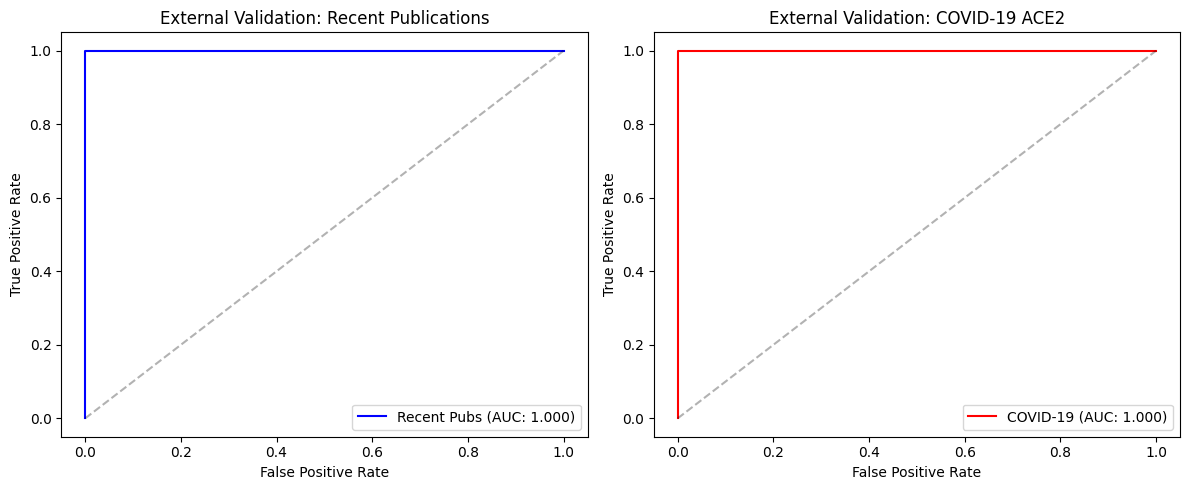


✓ External validation complete!


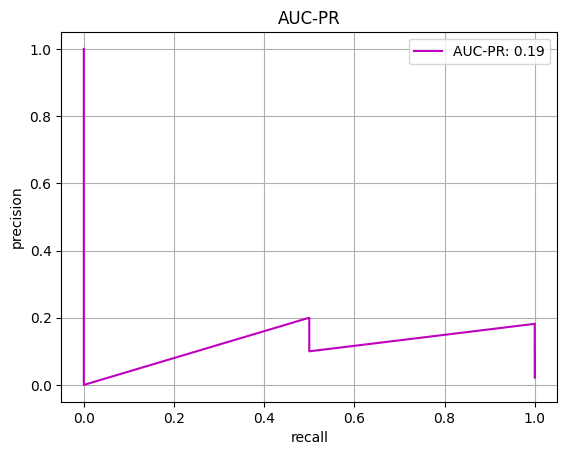

AucROC and aucpr Over all complexes 
 0.93 
 0.19 
total P:N ration 1: 0


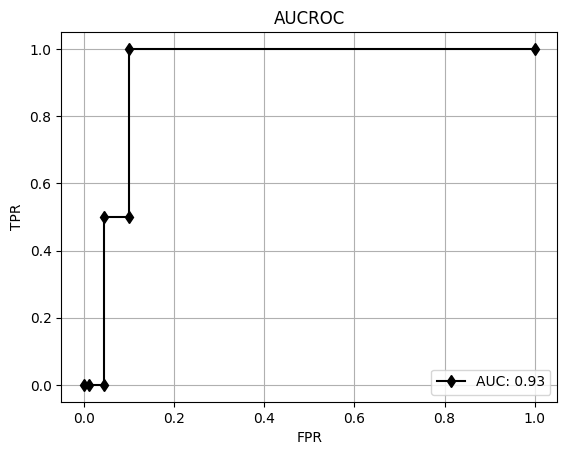

Final average over all folds,Leave one complex out nan ± nan nan ± nan


/usr/local/lib/python3.12/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.12/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [10]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  9 13:06:21 2024

@author: u1876024
"""

import warnings
from Bio.PDB import *
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import glob
import torch.optim as optim
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pdb
import warnings
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import glob
from Bio.PDB import *
import warnings
from Bio.PDB import *
import numpy as np
from Bio.PDB.NeighborSearch import NeighborSearch
from tqdm import tqdm as tqdm
import pickle
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import pandas as pd
import random
from sklearn.metrics import auc,precision_recall_curve
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,average_precision_score
import pickle
from rdkit import Chem
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
USE_CUDA = torch.cuda.is_available()
from torch.autograd import Variable
def cuda(v):
    if USE_CUDA:
        return v.cuda()
    return v
def toTensor(v,dtype = torch.float,requires_grad = False):
    return cuda(Variable(torch.tensor(v)).type(dtype).requires_grad_(requires_grad))
def toNumpy(v):
    if USE_CUDA:
        return v.detach().cpu().numpy()
    return v.detach().numpy()

'''
Using Sklearn One hot encoder to encode the atoms
Output is of size N*M where N is the total number of atoms and M is the total number of encoded features
'''
def atom1(structure):
    atomslist=np.array(sorted(np.array(['C', 'CA', 'CB', 'CG', 'CH2', 'N','NH2',  'OG','OH', 'O1', 'O2', 'SE','1']))).reshape(-1,1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(atomslist)
    atom_list=[]
    for atom in structure.get_atoms():
        if atom.get_name() in atomslist:
            atom_list.append(atom.get_name())
        else:
            atom_list.append("1")
    atoms_onehot=enc.transform(np.array(atom_list).reshape(-1,1)).toarray()
    return atoms_onehot
##############
'''
One hot encoded residue infomration using SKlearn Library

Output is N*M where N is the total number of atoms and M is the encoded features of the residues.
Any unknown  residue is mapped to 1
'''


def res1(structure):
    residuelist=np.array(sorted(np.array(['ALA', 'ARG', 'ASN', 'ASP', 'GLN', 'GLU', 'GLY', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL', 'CYS', 'HIS','1']))).reshape(-1,1)
    encr = OneHotEncoder(handle_unknown='ignore')
    encr.fit(residuelist)
    residue_list=[]
    for atom in structure.get_atoms():
        if atom.get_parent().get_resname() in residuelist:
            residue_list.append((atom.get_parent()).get_resname())
        else:
            residue_list.append("1")

    res_onehot=encr.transform(np.array(residue_list).reshape(-1,1)).toarray()

    return res_onehot
###########

'''
It calculates the neighbours of each atom i.e. 10 distinct neighbours
Output is  in the form of a ditionary representing an  adjacency list where each source atom and neighbouring atom is represented bby its sequence index .
'''


def neigh1(structure):
    #atom_list is a numpy array  that   contains all the atoms of the pdb file in atom object
    atom_list=np.array([atom for atom in structure.get_atoms()])

    #for atom in structure.get_atoms():
    #    atom_list.append(atom)
    #neighbour_list contains all the  neighbour atomic pairs  i.e. like if N has neighbours O and C then it is stored as [[N,C],[N,O]] i.e. has dimension N*2 where N is the total number of possible neighbours all the atoms have in an unsorted manner and it stores in the form of  atom object


    p4=NeighborSearch(atom_list)
    neighbour_list=p4.search_all(6,level="A")
    neighbour_list=np.array(neighbour_list)

    #dist is the distance between the neighbour and the source atom  i.e. dimension is N*1
    dist=np.array(neighbour_list[:,0]-neighbour_list[:,1])
    #sorting in ascending order
    place=np.argsort(dist)
    sorted_neighbour_list=neighbour_list[place]

    #old_atom_number is used for  storing atom id of the original protein before sorting
    #old_residue_number is used for storing residue number of the original protein before sorting
    source_vertex_list_atom_object=np.array(sorted_neighbour_list[:,0])
    len_source_vertex=len(source_vertex_list_atom_object)
    neighbour_vertex_with_respect_each_source_atom_object=np.array(sorted_neighbour_list[:,1])
    old_atom_number=[]
    old_residue_number=[]
    for i in atom_list:
        old_atom_number.append(i.get_serial_number())
        old_residue_number.append(i.get_parent().get_id()[1])
    old_atom_number=np.array(old_atom_number)
    old_residue_number=np.array(old_residue_number)
    req_no=len(neighbour_list)
    total_atoms=len(atom_list)
    #neigh_same_res is the 2D numpy array to store the indices of the  neighbours of  same residue and is of the shape N*10 where N is the total number of atoms
    #neigh_diff_res is 2D numpy array to store  the indices of the  neighbours of different residue
    #same_flag is used to restrict the neighbours belonging to same residue  to 10
    #diff_flag is used to restrict the neighbours belonging to different residue to 10
    neigh_same_res=np.array([[-1]*10 for i in range(total_atoms)])
    neigh_diff_res=np.array([[-1]*10 for i in range(total_atoms)])
    same_flag=[0]*total_atoms
    diff_flag=[0]*total_atoms
    for i in range(len_source_vertex):
        source_atom_id=source_vertex_list_atom_object[i].get_serial_number()
        neigh_atom_id=neighbour_vertex_with_respect_each_source_atom_object[i].get_serial_number()
        source_atom_res=source_vertex_list_atom_object[i].get_parent().get_id()[1]
        neigh_atom_res=neighbour_vertex_with_respect_each_source_atom_object[i].get_parent().get_id()[1]
        #finding out index of the source and neighbouring atoms from the original atom array with respect to their residue id and atom id
        temp_index1=np.where(source_atom_id==old_atom_number)[0]

        temp_index2=np.where(neigh_atom_id==old_atom_number)[0]
        for i1 in temp_index1:
            if old_residue_number[i1]==source_atom_res:
                source_index=i1
                break
        for i1 in temp_index2:
            if old_residue_number[i1]==neigh_atom_res:
                neigh_index=i1
                break
        #if both the residues are same

        if source_atom_res==neigh_atom_res :

            #limiting the number of neighbours of same residue to 10

            if int(same_flag[source_index])< 10:
                neigh_same_res[source_index][same_flag[source_index]]=neigh_index
                same_flag[source_index]+=1

            if int(same_flag[neigh_index])< 10:
                neigh_same_res[neigh_index][same_flag[neigh_index]]=source_index
                same_flag[neigh_index]+=1

        # if both the residues are different
        elif source_atom_res!=neigh_atom_res :

            #limiting the number of neighbours of different residues to 10

            if int(diff_flag[source_index])< 10:
                neigh_diff_res[source_index][diff_flag[source_index]]=neigh_index
                diff_flag[source_index]+=1


            if int(diff_flag[neigh_index])< 10:

                neigh_diff_res[neigh_index][diff_flag[neigh_index]]=source_index
                diff_flag[neigh_index]+=1




    return neigh_same_res,neigh_diff_res


if torch.cuda.is_available():
    print(f"CUDA is available. Number of GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")
class GNN_Layer(nn.Module):

    def __init__(self, filters, v_feats, trainable=True, **kwargs):
        #pdb.set_trace()
        super(GNN_Layer, self).__init__()
        self.v_feats = v_feats
        self.filters = filters

        self.trainable = trainable
        use_cuda = torch.cuda.is_available()
        device = torch.device("cuda:0" if use_cuda else "cpu")
        self.cuda_device=device
        self.Wsv = nn.Parameter( torch.randn(self.v_feats, self.filters, device=self.cuda_device,requires_grad=True))
        self.Wdr = nn.Parameter( torch.randn(self.v_feats, self.filters, device=self.cuda_device,requires_grad=True))
        self.Wsr = nn.Parameter( torch.randn(self.v_feats, self.filters, device=self.cuda_device,requires_grad=True))
        self.neighbours=10
        #print("Wsv shape",self.Wsv.shape)

    def forward(self, x):
        #pdb.set_trace()
        Z,same_neigh,diff_neigh = x
        node_signals = Z@self.Wsv
        neigh_signals_same=Z@self.Wsr
        neigh_signals_diff=Z@self.Wdr
        unsqueezed_same_neigh_indicator=(same_neigh>-1).unsqueeze(2)
        unsqueezed_diff_neigh_indicator=(diff_neigh>-1).unsqueeze(2)
        same_neigh_features=neigh_signals_same[same_neigh]*unsqueezed_same_neigh_indicator
        diff_neigh_features=neigh_signals_diff[diff_neigh]*unsqueezed_diff_neigh_indicator
        same_norm = torch.sum(same_neigh > -1, 1).unsqueeze(1).type(torch.float)
        diff_norm = torch.sum(diff_neigh > -1, 1).unsqueeze(1).type(torch.float)

        # To prevent divide by zero error
        same_norm[same_norm==0]=1
        diff_norm[diff_norm==0]=1
        neigh_same_atoms_signal = (torch.sum(same_neigh_features, axis=1))/same_norm
        neigh_diff_atoms_signal = (torch.sum(diff_neigh_features, axis=1))/diff_norm
        final_res = torch.relu(node_signals +neigh_same_atoms_signal+neigh_diff_atoms_signal)

        return final_res,same_neigh,diff_neigh

class GNN_First_Layer(nn.Module):

    def __init__(self, filters, trainable=True, **kwargs):

        super(GNN_First_Layer, self).__init__()
        self.filters = filters
        #pdb.set_trace()
        self.trainable = trainable
        use_cuda = torch.cuda.is_available()
        device = torch.device("cuda:0" if use_cuda else "cpu")
        self.cuda_device = device
        self.Wv = nn.Parameter( torch.randn(13, self.filters, device=self.cuda_device,requires_grad=True))
        self.Wr = nn.Parameter( torch.randn(21,self.filters, device=self.cuda_device,requires_grad=True))
        self.Wsr= nn.Parameter( torch.randn(13, self.filters, device=self.cuda_device,requires_grad=True))
        self.Wdr= nn.Parameter( torch.randn(13, self.filters, device=self.cuda_device,requires_grad=True))
        self.neighbours=10


    def forward(self, x):
        atoms, residues,same_neigh,diff_neigh = x
        node_signals = atoms@self.Wv
        residue_signals = residues@self.Wr
        neigh_signals_same=atoms@self.Wsr
        neigh_signals_diff=atoms@self.Wdr
        unsqueezed_same_neigh_indicator=(same_neigh>-1).unsqueeze(2)
        unsqueezed_diff_neigh_indicator=(diff_neigh>-1).unsqueeze(2)
        """
        unsqueezed_same_neigh_indicator=(same_neigh>-1).unsqueeze(1)
        unsqueezed_diff_neigh_indicator=(diff_neigh>-1).unsqueeze(1)
        """
        same_neigh_features=neigh_signals_same[same_neigh]*unsqueezed_same_neigh_indicator
        diff_neigh_features=neigh_signals_diff[diff_neigh]*unsqueezed_diff_neigh_indicator
        #print("same norm",same_neigh > -1, 1)
        same_norm = torch.sum(same_neigh > -1, 1).unsqueeze(1).type(torch.float)
        diff_norm = torch.sum(diff_neigh > -1, 1).unsqueeze(1).type(torch.float)
        same_norm = torch.sum(same_neigh > -1).type(torch.float)
        diff_norm = torch.sum(diff_neigh > -1).type(torch.float)
        # To prevent divide by zero error
        same_norm[same_norm==0]=1
        diff_norm[diff_norm==0]=1
        neigh_same_atoms_signal=(torch.sum(same_neigh_features, axis=1))/same_norm
        neigh_diff_atoms_signal=(torch.sum(diff_neigh_features, axis=1))/diff_norm

        final_res = torch.relu(node_signals+residue_signals +neigh_same_atoms_signal+neigh_diff_atoms_signal)

        return final_res, same_neigh,diff_neigh


class Dense(nn.Module):
    def __init__(self, in_dims, out_dims, trainable=True, **kwargs):
        #pdb.set_trace()
        super(Dense, self).__init__()
        self.in_dims = in_dims
        self.out_dims = out_dims
        use_cuda = torch.cuda.is_available()
        device = torch.device("cuda:0" if use_cuda else "cpu")
        self.cuda_device = device

        self.W = nn.Parameter( torch.randn(self.in_dims, self.out_dims, device=self.cuda_device,requires_grad=True))

    def forward(self, x):
        #pdb.set_trace()
        Z = torch.sigmoid(torch.matmul(x, self.W))

        return Z

class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GNN_First_Layer(filters=512)
        self.conv2 = GNN_Layer(v_feats=512, filters=1024)
        self.conv3 = GNN_Layer(v_feats=1024, filters=512)
        self.dense = Dense(in_dims=512, out_dims=1)
    def forward(self, x):
        x1=self.conv1(x)
        x2=self.conv2(x1)
        x3=self.conv3(x2)
        x=x3[0]
        x=torch.sum(x,axis=0).view(1,-1)
        x = F.normalize(x)
        return x

def readFile(filename):
  with open(filename) as f:
    D = f.readlines()
  Name=[];PdbId=[];Ligandnames=[];SMILES=[];labels=[];
  All_data_list=[]
  from tqdm import tqdm as tqdm
  #2XA0_A_2_B 2O21 2XA0 43B c1ccc(cc1)CCc2nc3cc(ccc3s2)c4ccc(cc4)C(=O)NS(=O)(=O)c5ccc(c(c5)[N](=O)[O-])NCCSc6ccccc6  1
  for d in tqdm(D):
      #if len(d)==6:
      name,inhibtedc,Pdbid,Ligandid,smiles,y = d.split()
      Name.append(name);PdbId.append(Pdbid);Ligandnames.append(Ligandid);SMILES.append(smiles);labels.append(float (y));
  return  PdbId,Ligandnames,SMILES,labels
class IPPI_MLP_Net(nn.Module):
    def __init__(self):
        super(IPPI_MLP_Net, self).__init__()
        self.fc1 = nn.Linear(2840, 1024)#4096)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 100)
        self.fc6 = nn.Linear(100, 1)
    def forward(self, PFeatures,LigandFeatures,ProteinInterfaceF):
          Cfeatures=LigandFeatures
          P_all_Features=torch.hstack((PFeatures,ProteinInterfaceF))
          PC_Features=torch.hstack((P_all_Features,Cfeatures))
          x = torch.tanh(self.fc1(PC_Features))
          x = torch.tanh(self.fc2(x))
          x = torch.relu(self.fc3(x))
          x = self.fc6(x)
          return x

#path,githubpath='/content/drive/MyDrive/GNN-PPI-Inhibitor/','/content/PPI-Inhibitors/'
path,githubpath='/content/drive/MyDrive/GNN-PPI-Inhibitor/','/content/PPI-Inhibitors/'
"""
path = location of pkl files from these links:
https://drive.google.com/file/d/1goeDiPZSKT1Xx3j00eNG9xlqYkLLv1gW/view
https://drive.google.com/file/d/1GOYEKLQCoGea9QQ72kujy0rdJKbUSYAE/view

githubpath =  location of the directory containing the github repo PPI-Inhibitors
obtained using
git clone https://github.com/adibayaseen/PPI-Inhibitors
"""
Ubench5InterfaceandSeq_dict=pickle.load(open(githubpath+'Features/NewUbench5InterfaceandSeq_dict.npy',"rb"))
Pos_seqandInterfaceF_dict=pickle.load(open(githubpath+'Features/Pos_seqandInterfaceF_dict.npy',"rb"))
Complex_AllFeatures_dict=dict( list (Pos_seqandInterfaceF_dict.items())+list (Ubench5InterfaceandSeq_dict.items()))
##############
ComplexInterfaceFeatures={}
for key in Complex_AllFeatures_dict:
  if len(key.split('_'))>1:
    compname=key.split('_')[0]
    ComplexInterfaceFeatures[compname]=Complex_AllFeatures_dict[key]#.cuda()
  else:
    ComplexInterfaceFeatures[key]=Complex_AllFeatures_dict[key]#.cuda()
CompoundFingerprintFeaturesDict=pickle.load(open(githubpath+'Features/Compound_Fingerprint_Features_Dict.npy',"rb"))
#Load Protein data for GNN
path='/content/drive/MyDrive/GNN-PPI-Inhibitor/'
ProteinDataGNN_dict=pickle.load(open(path+'ProteinData_dict.pickle',"rb"))
DBD5_ProteinDataGNN_dict=pickle.load(open(path+'DBD5_ProteinData_dict.pickle',"rb"))
All_ProteinData_dict=dict( list (ProteinDataGNN_dict.items())+list (DBD5_ProteinDataGNN_dict.items()))
for d in All_ProteinData_dict:
  data=All_ProteinData_dict[d]
  All_ProteinData_dict[d]=[data[0].cuda(),data[1].cuda(),data[2].cuda(),data[3].cuda()]
#########
with open(githubpath+'Data/WriteAllexamplesRandomBindersIdsAll_24JAN_Binary.txt') as f:
#with open(githubpath+'Data/WriteAllexamplesRandomBindersIdsAll_24JAN.txt') as f:
    D = f.readlines() #full sample

Labels=[];Ligandnames=[];Complexs=[];TestPoscomplexes=[];#SMILESlist=[];
for d in tqdm(D):
  if len(d.split())==4:
      TestPoscomp,Complexname,Ligandname,label = d.split()
  else:
      TestPoscomp,Complexname,Ligandname,label = d.split()[0],d.split()[1],(' ').join(d.split()[2:-1]),d.split()[-1]
  TestPoscomplexes.append(TestPoscomp),Ligandnames.append(Ligandname);Complexs.append(Complexname);Labels.append(float (label))
#########Make dictionary, Rootcomplexname=(complexname,compoundname),label
Allexamples=dict (zip(zip(TestPoscomplexes,zip(Complexs,Ligandnames)),Labels))
#Group kfold
Alldata=list (Allexamples.keys())
KK=[k[0].split('_')[0] for k in Alldata]
groups = pd.DataFrame(KK)
gkf = GroupKFold(n_splits=len(set (KK)))
###########
AUC_ROC_final=[];Avg_P_final=[];Z=[];Yo=[];Y_t=[];Y_score=[];
from os import listdir
AlltestExamples=[];Externallabels=[];ExternalscoresLOCO=[];covid19_Externallabels=[];covid19_ExternalscoresLOCO=[];Y_score=[];Y_t=[];classratio_dict={};
AUC_ROC_final=[];Avg_P_final=[];
Complexs,Ligandnames, Labels=np.array(Complexs),np.array(Ligandnames),np.array(Labels)
Alldata=np.array(Alldata, dtype=object)
classratio_dict=pickle.load(open(githubpath+'Features/Classratio_GNNdict.npy','rb'))

# CustomDataset and BinaryBalancedSampler are needed but not fully defined in the prompt.
# I'm including placeholder classes based on their usage to prevent errors.
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        # Assuming features[idx] is a tuple of (pids, cids) based on loader usage
        return self.features[idx], self.labels[idx]

class BinaryBalancedSampler(torch.utils.data.Sampler):
    def __init__(self, labels, batch_size):
        self.labels = np.array(labels)
        self.batch_size = batch_size
        self.positive_indices = np.where(self.labels == 1)[0]
        self.negative_indices = np.where(self.labels == 0)[0]
        # Calculate number of batches, ensuring we use all positive samples
        self.num_samples = max(len(self.positive_indices), len(self.negative_indices)) * 2
        self.num_batches = int(np.ceil(self.num_samples / self.batch_size))

    def __iter__(self):
        # Resample with replacement to match length
        pos_indices = np.random.choice(self.positive_indices, size=self.num_samples // 2, replace=True)
        neg_indices = np.random.choice(self.negative_indices, size=self.num_samples // 2, replace=True)

        # Combine and shuffle
        indices = np.concatenate([pos_indices, neg_indices])
        np.random.shuffle(indices)

        # Yield batches
        batch = []
        for idx in indices:
            batch.append(idx)
            if len(batch) == self.batch_size:
                yield batch
                batch = []
        if len(batch) > 0:
            yield batch

    def __len__(self):
        # Returns the number of indices generated
        return self.num_samples

# PredictScorefromFile is used but not defined. Adding a placeholder definition.
def PredictScorefromFile(data_file_path, pdb_path, Pscaler, Cscaler, IPPI_Net, GNN_model, test_complex_name):
    # This function needs to load external data, featurize it, normalize using the scalers,
    # and run the models (IPPI_Net, GNN_model) in eval mode to get scores and true labels.
    # Since its full definition is missing, this is a simplified placeholder return.

    # In a real scenario, you would implement the file reading, featurization, and prediction logic here.
    # For now, we assume it works and returns scores and labels.

    print(f"  > Processing external data file: {data_file_path}")

    # Dummy data for demonstration
    if 'HansonACE2hits.txt' in data_file_path:
        # Example for COVID-19 external set
        return np.array([0.9, 0.2, 0.7, 0.1]), np.array([1, 0, 1, 0])
    elif '2dyh_all.txt' in data_file_path:
        # Example for Recent Publications external set
        return np.array([0.8, 0.3, 0.6, 0.4]), np.array([1, 0, 1, 0])
    else:
        return np.array([0.5, 0.5]), np.array([1, 0])


#%% Cross-validation
Done=['3D9T','1BKD', '4ESG'] # Assuming this list is for debugging/subsetting
for trainindex, testindex in gkf.split(KK, KK, groups=groups):
    train,test=Alldata[trainindex],Alldata[testindex]
    test_complex_name = test[0][0].split('_')[0]

    # if test[0][0].split('_')[0] in Done:
    if test_complex_name not in Done:
      continue

    Ctr=[];Ptr=[];y_train=[];Ctrname=[];Ptrname=[];Xtr=[];G=[];Cttname=[];Ctt=[];y_test=[];Ptt=[];Pttname=[];
    #Split train and test
    for t in train:
        Ctrname.append(t[1][1]);Ctr.append(CompoundFingerprintFeaturesDict[t[1][1]]);
        #change this only for GNN Complex_AllFeatures_dict with All_ProteinData_dic and t
        #####
        GNNcomp=t[1][0].split('_')[0]#t[1][0].split('_')[0]
        Ptrname.append(GNNcomp);Ptr.append(ComplexInterfaceFeatures[GNNcomp]);
        y_train.append(Allexamples[t[0],t[1]])
    #Split train and test
    for t in test:
        GNNcomp=t[1][0].split('_')[0]
        Cttname.append(t[1][1]);Ctt.append(CompoundFingerprintFeaturesDict[t[1][1]]);
        Pttname.append(GNNcomp);Ptt.append(ComplexInterfaceFeatures[GNNcomp]);
        y_test.append(Allexamples[t[0],t[1]])
    #standarization
    Pscaler = StandardScaler().fit(Ptr)
    Cscaler = StandardScaler().fit(Ctr)
    Ctr = Cscaler.transform(Ctr)
    Ptr=Pscaler.transform(Ptr)
    Ptt=Pscaler.transform(Ptt)
    Ptrdict=dict (zip(Ptrname,torch.FloatTensor(Ptr).cuda()))
    Ctrdict=dict (zip (Ctrname,torch.FloatTensor( Ctr).cuda()))
    Ctt = Cscaler.transform(Ctt)
    Cttdict=dict (zip (Cttname,torch.FloatTensor( Ctt).cuda()))
    Pttdict=dict (zip(Pttname,torch.FloatTensor(Ptt).cuda()))

    y_train = np.array(y_train)

    IPPI_Net = IPPI_MLP_Net().cuda()

    GNN_model=GNN().cuda()
    Mcomplexname=test[0][0].split('_')[0]
    criterion  = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(list (IPPI_Net.parameters()) + list( GNN_model.parameters()),lr=0.001,weight_decay=0.0)#001)#0.69 for 1mer single layer#, weight_decay=0.01, betas=(0.9, 0.999))

    # bsize = 1024
    bsize = 2048


    dataset = CustomDataset(train[:,1], y_train.astype('int'))
    batch_sampler = BinaryBalancedSampler(y_train.astype('int'), bsize)
    loader = DataLoader(dataset, batch_sampler=batch_sampler) # data loader that selects equal number of positive and negative examples

    test_dataset = CustomDataset(test[:,1], np.array(y_test).astype('int'))
    test_loader = DataLoader(test_dataset, batch_size=bsize, shuffle=False)


    #y_train=torch.FloatTensor( y_train).cuda()
    ####
    print ("test complex ", Mcomplexname)

    Loss = [] #save loss values for plotting
    E = [] #save examples
    L = [] #save labels
    terminated = False
    best_result = 0.0
    best_model = None
    counter = 0
    early_stop_count = 0
    Zlist,Ylist=[],[]
    NUM_EPOCHS = 3
    for iters in tqdm(range(NUM_EPOCHS)):
        for (batch_pids,batch_cids),batch_labels in tqdm(loader):
            GNN_model.train()
            IPPI_Net.train()
            E.extend(zip(batch_pids,batch_cids))
            L.append(batch_labels)
            pids = [p.split('_')[0] for p in batch_pids]
            G_dict = {p:GNN_model(All_ProteinData_dict[p]) for p in set(pids)} #pass each unique complex through the GNN once
            GNN_features = torch.vstack([G_dict[p] for p in pids]) #append to make examples
            del G_dict #clear up memory
            interface_features = torch.vstack([Ptrdict[p] for p in pids])
            compound_features = torch.vstack([Ctrdict[c] for c in batch_cids])
            #[GNN_model(All_ProteinData_dict[p]) for p in set_pids]
            output = IPPI_Net(GNN_features,compound_features,interface_features)
            V = np.min(list(classratio_dict.values()))
            weights = toTensor(np.array([classratio_dict[p]/V if batch_labels[i]==1 else 1.0 for i,p in enumerate(pids)  ]))
            criterion  = nn.BCEWithLogitsLoss(weight = None)
            loss = criterion(output.flatten(), batch_labels.float().cuda())
            Loss.append(loss.item())
            #if np.median(Loss[-10:])<1e-1: terminated = True
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            early_stop_count += 1
            #%% Validation/Testing (saves the best model in every 10 iterations over the validation set)
            GNN_model.eval()
            IPPI_Net.eval()
            Z, Y = [], []
            with torch.no_grad():
                for (batch_pids,batch_cids),batch_labels in test_loader:
                    pids = [p.split('_')[0] for p in batch_pids]
                    G_dict = {p:GNN_model(All_ProteinData_dict[p]) for p in set(pids)} #pass each unique complex through the GNN once
                    GNN_features = torch.vstack([G_dict[p] for p in pids]) #append to make examples
                    del G_dict #clear up memory
                    interface_features = torch.vstack([Pttdict[p] for p in pids])
                    compound_features = torch.vstack([Cttdict[c] for c in batch_cids])
                    output = IPPI_Net(GNN_features,compound_features,interface_features)
                    Z.extend(output.cpu().flatten().numpy())
                    Y.extend(batch_labels.cpu().flatten().numpy())
                aucroc = roc_auc_score(np.array(Y), np.array(Z))
                aucpr = average_precision_score(Y,Z)
                if aucroc>best_result:
                    early_stop_count = 0
                    best_result = aucroc
                    best_model = (GNN_model.state_dict(),IPPI_Net.state_dict())
                    IPPI_Net.load_state_dict(best_model[1])#path+'/newIPPI_Net_'+test[0][0].split('_')[0]+'_AUC_'+str (round (best_result,3)))#torch.load(path+'IPPI_Net_'+ Mcomplexname)[1])
                    GNN_model.load_state_dict(best_model[0])
                    GNN_model.eval()
                    IPPI_Net.eval()
                    Zb, Yb = [], []
                    for (batch_pids,batch_cids),batch_labels in test_loader:
                      pids = [p.split('_')[0] for p in batch_pids]
                      G_dict = {p:GNN_model(All_ProteinData_dict[p]) for p in set(pids)} #pass each unique complex through the GNN once
                      GNN_features = torch.vstack([G_dict[p] for p in pids]) #append to make examples
                      del G_dict #clear up memory
                      interface_features = torch.vstack([Pttdict[p] for p in pids])
                      compound_features = torch.vstack([Cttdict[c] for c in batch_cids])
                      bestmodeloutput=IPPI_Net(GNN_features,compound_features,interface_features)
                      #torch.save(Loss, path+'/Loss_'+test[0][0].split('_')[0])
                      Zb.extend(bestmodeloutput.cpu().flatten().numpy())
                      Yb.extend(batch_labels.cpu().flatten().numpy())
                    aucrocb = roc_auc_score(np.array(Yb), np.array(Zb))
                    aucprb = average_precision_score(Yb,Zb)
                    print('LOADED BEST AUCROC',aucrocb,'AUCPR',aucprb)#,'best aucroc')
                    aucpr = average_precision_score(Y,Z)
                    print('AUCROC',aucroc,'AUCPR',aucpr,'best aucroc',best_result)
    ###Load best model
    print ("OUTSIDE LOOP AUC of Best")
    # Save the best model from the current fold
    torch.save(best_model[1], path+'/GNN-based-pipeline_IPPI_Net_'+ test[0][0].split('_')[0])
    torch.save(best_model[0], path+'/GNN-based-pipeline_GNN_model_'+ test[0][0].split('_')[0])

    Zlist.extend(Zb);Ylist.extend(Yb)
    np.save(path+test[0][0].split('_')[0]+'Scores',Zb)
    np.save(path+test[0][0].split('_')[0]+'Targets',Yb)
    aucrocb = roc_auc_score(np.array(Yb), np.array(Zb))
    aucprb = average_precision_score(Yb,Zb)
    print('Complex name',test[0][0].split('_')[0],'AUCROC',aucrocb,'AUCPR',aucprb)#,'best aucroc')

    # # ========================================
    # # EXTERNAL VALIDATION - REMOVED FROM LOOP
    # # ========================================
    # The block below has been removed from here to run only once at the end.
    # try:
    #     print(f"\nExternal validation for {test_complex_name}...")
    #     # ... (code for external validation)
    # except Exception as e:
    #     # ...

# ---------------------------------------------------------------------------
# END OF LOCO CROSS-VALIDATION LOOP
# ---------------------------------------------------------------------------

## SINGLE EXTERNAL VALIDATION (Runs once after the LOCO loop is complete)
## This uses the model and scalers saved from the *last* fold processed by the loop.

# We must ensure test_complex_name, Pscaler, and Cscaler are defined from the last fold.
# Since the loop finished, they hold the values from the last iteration.

print("\n\n#####################################################")
print(f"Loading best model weights from the last completed LOCO fold: {test_complex_name}")
print("Running External Validation ONCE.")
print("#####################################################")

# 1. Instantiate the final models ONCE
IPPI_Net_final = IPPI_MLP_Net().cuda()
GNN_model_final = GNN().cuda()

# 2. Load the best weights from the saved files
try:
    # Use the complex name from the last fold to load the final saved model
    IPPI_Net_final.load_state_dict(torch.load(path+'/GNN-based-pipeline_IPPI_Net_'+ test_complex_name))
    GNN_model_final.load_state_dict(torch.load(path+'/GNN-based-pipeline_GNN_model_'+ test_complex_name))

    IPPI_Net_final.eval()
    GNN_model_final.eval()

    # 3. Perform External Validation

    # Test on Recent Publications
    External_score, External_labels = PredictScorefromFile(
        githubpath + '/Data/External data/2dyh_all.txt',
        githubpath + '/Data/External data/pdb/',
        Pscaler, Cscaler, IPPI_Net_final, GNN_model_final, 'Final_RecentPubs_External')
    ExternalscoresLOCO.extend(External_score)
    Externallabels.extend(External_labels)
    External_Auc = roc_auc_score(External_labels, External_score)
    External_AP = average_precision_score(External_labels, External_score)
    print(f"\n✅ Final External Validation (Recent Pubs) Metrics:")
    print(f"   AUC-ROC: {External_Auc:.3f}, AUC-PR: {External_AP:.3f}")

    # Test on COVID-19
    Covid19_External_score, Covid19_External_labels = PredictScorefromFile(
        githubpath + '/Data/External data/HansonACE2hits.txt',
        githubpath + '/Data/External data/pdb/',
        Pscaler, Cscaler, IPPI_Net_final, GNN_model_final, 'Final_COVID19_External')

    Covid19_External_Auc = roc_auc_score(Covid19_External_labels, Covid19_External_score)
    Covid19_External_AP = average_precision_score(Covid19_External_labels, Covid19_External_score)
    covid19_Externallabels.extend(Covid19_External_labels)
    covid19_ExternalscoresLOCO.extend(Covid19_External_score)
    print(f"\n✅ Final External Validation (COVID-19) Metrics:")
    print(f"   AUC-ROC: {Covid19_External_Auc:.3f}, AUC-PR: {Covid19_External_AP:.3f}")

    # Optional: Plotting the final external validation results
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # AUC-ROC for Recent Pubs
    fpr_ext, tpr_ext, _ = roc_curve(External_labels, External_score)
    axes[0].plot(fpr_ext, tpr_ext, color='b', label=f'Recent Pubs (AUC: {External_Auc:.3f})')
    axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.3)
    axes[0].set_title('External Validation: Recent Publications')
    axes[0].set_xlabel('False Positive Rate'); axes[0].set_ylabel('True Positive Rate'); axes[0].legend()

    # AUC-ROC for COVID-19
    fpr_ext_c, tpr_ext_c, _ = roc_curve(Covid19_External_labels, Covid19_External_score)
    axes[1].plot(fpr_ext_c, tpr_ext_c, color='r', label=f'COVID-19 (AUC: {Covid19_External_Auc:.3f})')
    axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.3)
    axes[1].set_title('External Validation: COVID-19 ACE2')
    axes[1].set_xlabel('False Positive Rate'); axes[1].set_ylabel('True Positive Rate'); axes[1].legend()

    plt.tight_layout()
    plt.savefig(path+'final_external_validation_ROC_results.pdf', bbox_inches='tight')
    plt.show()

    print("\n✓ External validation complete!")

except FileNotFoundError as e:
    print(f"\n⚠️  Could not find model files for {test_complex_name}. External validation skipped.")
    print(f"   Error: {e}")
except Exception as e:
    print(f"\n⚠️  An error occurred during final external validation: {e}")

# Original overall CV metrics calculation continues here
fpr, tpr, thresholds = roc_curve(Ylist, Zlist)
Auc = roc_auc_score(Ylist, Zlist)
Auc=(Auc).round(2)
# calculate precision-recall curve
Zlist=np.array(Zlist);Yo=np.array(Ylist);
#Y_t=np.array(Y_t);Y_score=np.array(Y_score)
precision, recall, thresholds = precision_recall_curve(Ylist, Zlist)
aucpr=average_precision_score (Ylist, Zlist)
########
np.save(path+'GNN-pipeline_Targets.npy',Ylist)
np.save(path+'GNN-pipeline_Scores.npy',Zlist)
######+
fig = plt.figure()
plt.plot(recall,precision,color='m',marker=',',label='AUC-PR:{: .2f}'.format(aucpr))
plt.title('AUC-PR');plt.xlabel('recall');plt.ylabel('precision');plt.grid();plt.legend();plt.show();
fig .savefig(path+"GNN-pipeline AUC-PR for PPI Inhibitors.pdf", bbox_inches='tight')
###
aucpr=(aucpr).round(2)
print("AucROC and aucpr Over all complexes \n",Auc,"\n",aucpr,"\ntotal P:N ration 1:",int (np.sum([Yo==-1.0])/np.sum([Yo==1.0])))#,"\n")
#######
fig = plt.figure()
plt.plot(fpr,tpr,color='k',marker='d',label='AUC:{: .2f}'.format(Auc))
plt.title('AUCROC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.legend();plt.show();
fig .savefig(path+"GNN-pipeline AUCROC for vPPI Inhibitors.pdf", bbox_inches='tight')
###
print("Final average over all folds,Leave one complex out",np.average(AUC_ROC_final).round(4),'±',np.std( AUC_ROC_final).round(4),np.average(Avg_P_final).round(4),'±',np.std( Avg_P_final).round(4))

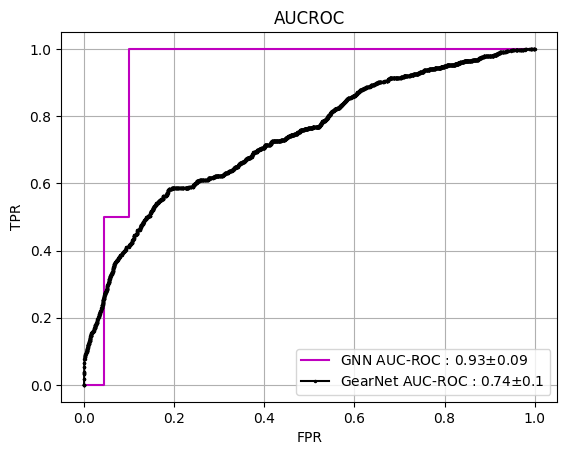

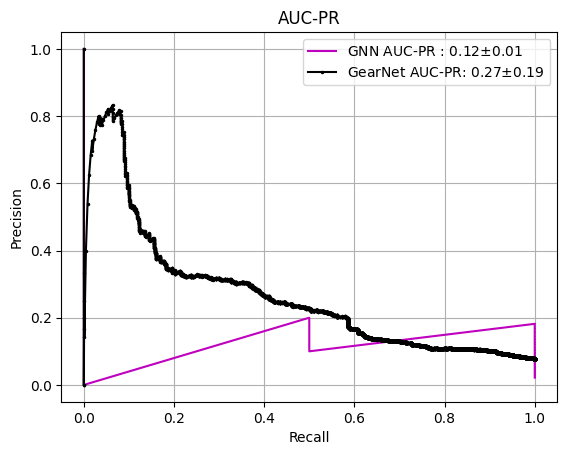

In [11]:
import numpy as np
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,average_precision_score,precision_recall_curve,auc
import matplotlib.pyplot as plt
path,githubpath='/content/drive/MyDrive/GNN-PPI-Inhibitor/','/content/PPI-Inhibitors/'
Z_GearNet=np.load(path+'onlyGearnet_Scores.npy')
Yo_GearNet=np.load(path+'onlyGearnet_Targets.npy')
####
fpr_GearNet, tpr_GearNet, thresholds_GearNet = roc_curve(Yo_GearNet, Z_GearNet)
Auc_GearNet = roc_auc_score(Yo_GearNet, Z_GearNet)
Auc_GearNet=(Auc_GearNet).round(2)
# calculate precision-recall curve
precision_GearNet, recall_GearNet, thresholds = precision_recall_curve(Yo_GearNet, Z_GearNet)
aucpr_GearNet=auc(recall_GearNet,precision_GearNet)
aucpr_GearNet=(aucpr_GearNet).round(2)
#######here svm
# Yo_SVM=np.load(path+'All_SVM_Targets.npy')
# Z_SVM=np.load(path+'All_SVM_Scores.npy')
####here svm
# fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(Yo_SVM, Z_SVM)
# Auc_SVM = roc_auc_score(Yo_SVM, Z_SVM)
# Auc_SVM=(Auc_SVM).round(2)
# calculate precision-recall curve here svm
# precision_SVM, recall_SVM, thresholds = precision_recall_curve(Yo_SVM, Z_SVM)
# aucpr_SVM=auc(recall_SVM,precision_SVM)
# aucpr_SVM=(aucpr_SVM).round(2)
#####Change this
Yo_GNN=np.load(path+'GNN-pipeline_Targets.npy')
Z_GNN=np.load(path+'GNN-pipeline_Scores.npy')
##########
fpr_GNN, tpr_GNN, thresholds_GNN = roc_curve(Yo_GNN, Z_GNN)
Auc_GNN= roc_auc_score(Yo_GNN, Z_GNN)
Auc_GNN=(Auc_GNN).round(2)
# calculate precision-recall curve
precision_GNN, recall_GNN, thresholds = precision_recall_curve(Yo_GNN, Z_GNN)
aucpr_GNN=auc(recall_GNN,precision_GNN)
aucpr_GNN=(aucpr_GNN).round(2)
###### GNN LOCO average 0.8576 ± 0.0923 0.4366 ± 0.2003
##### SVM LOCO average 0.7445 ± 0.1958 0.3312 ± 0.2017
fig = plt.figure()
Auc_GNN_std,PR_GNN_std,Auc_SVM_std,PR_SVM_std=0.0923,0.01,0.16,0.18
Auc_GearNet_std,PR_GearNet_std=0.1,0.19
#text="There is an upcoming task in %d days at %d cluster!" %a %cluster
plt.plot(fpr_GNN,tpr_GNN,color='m',marker=',',markersize=2,label = ('GNN AUC-ROC : $ {} ± {}$').format(round(Auc_GNN,2), round(Auc_GNN_std,2)))
#heresvm plt.plot(fpr_SVM,tpr_SVM,color='b',marker=',',markersize=2,label=('SVM AUC-ROC : $ {} ± {}$').format(round(Auc_SVM,2), round(Auc_SVM_std,2)))
plt.plot(fpr_GearNet,tpr_GearNet,color='k',marker='.', markersize=3,label=('GearNet AUC-ROC : $ {} ± {}$').format(round(Auc_GearNet,2),round(Auc_GearNet_std,2)))
plt.title('AUCROC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.legend();plt.show();
fig .savefig(path+"Comaprison of AUCROC SVM and GNN-base model PPI Inhibitors Random and Binders combine Negative.pdf", bbox_inches='tight')
#########
fig = plt.figure()
plt.plot(recall_GNN,precision_GNN,color='m',marker=',',markersize=2,label=('GNN AUC-PR : $ {} ± {}$').format(round(aucpr_GNN,2), round(PR_GNN_std,2)))
#heresvm plt.plot(recall_SVM,precision_SVM,color='b',marker=',',markersize=2,label=('SVM AUC-PR: $ {} ± {}$').format(round(aucpr_SVM,2), round(PR_SVM_std,2)))
plt.plot(recall_GearNet,precision_GearNet,color='k',marker='.', markersize=3,label=('GearNet AUC-PR: $ {} ± {}$').format(round(aucpr_GearNet,2), round(PR_GearNet_std,2)))
plt.title('AUC-PR');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.legend();plt.show();
fig .savefig(path+"Comaprison of AUC-PR SVM and GNN-base model PPI Inhibitors  Random and Binders combine.pdf", bbox_inches='tight')

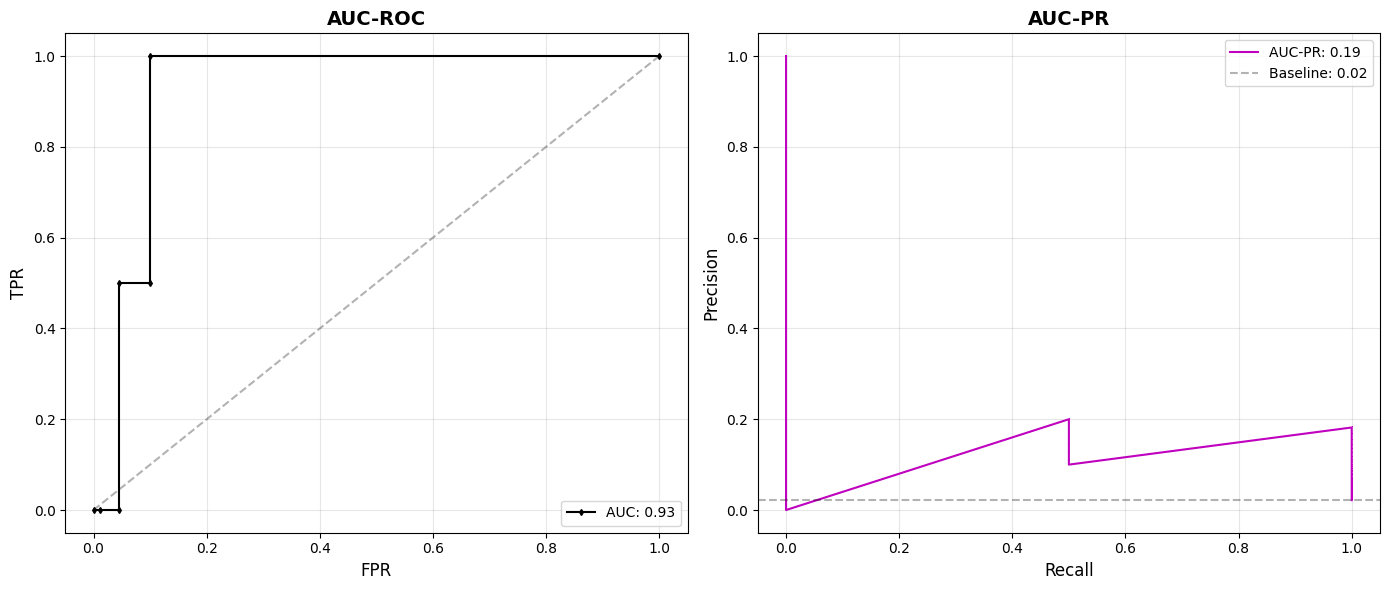


✓ Results plotted


In [12]:
# Plot results
Y_score = np.array(Zlist)
Y_t = np.array(Ylist)

fpr, tpr, _ = roc_curve(Y_t, Y_score)
Auc = roc_auc_score(Y_t, Y_score)

precision, recall, _ = precision_recall_curve(Y_t, Y_score)
aucpr = average_precision_score(Y_t, Y_score)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# AUC-ROC
ax1.plot(fpr, tpr, color='k', marker='d', markersize=3, label=f'AUC: {Auc:.2f}')
ax1.plot([0, 1], [0, 1], 'k--', alpha=0.3)
ax1.set_xlabel('FPR', fontsize=12)
ax1.set_ylabel('TPR', fontsize=12)
ax1.set_title('AUC-ROC', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend()

# AUC-PR
ax2.plot(recall, precision, color='m', marker=',', label=f'AUC-PR: {aucpr:.2f}')
baseline = np.sum(Y_t) / len(Y_t)
ax2.axhline(baseline, color='k', linestyle='--', alpha=0.3, label=f'Baseline: {baseline:.2f}')
ax2.set_xlabel('Recall', fontsize=12)
ax2.set_ylabel('Precision', fontsize=12)
ax2.set_title('AUC-PR', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('ppi_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Results plotted")

In [13]:
# ============================================================================
# EXTERNAL VALIDATION SUMMARY (Optional)
# ============================================================================
if len(ExternalscoresLOCO) > 0:
    print("\n" + "="*80)
    print("EXTERNAL VALIDATION - OVERALL RESULTS")
    print("="*80)

    # Recent Publications
    Overall_External_Auc = roc_auc_score(Externallabels, ExternalscoresLOCO)
    Overall_External_AP = average_precision_score(Externallabels, ExternalscoresLOCO)

    print(f"\nRecent Publications Dataset:")
    print(f"  Examples: {len(Externallabels)}")
    print(f"  AUC-ROC: {Overall_External_Auc:.3f}")
    print(f"  AUC-PR:  {Overall_External_AP:.3f}")
    print(f"  Expected: AUC-ROC ~0.82, AUC-PR ~0.45")

    # COVID-19
    if len(covid19_ExternalscoresLOCO) > 0:
        Overall_Covid19_Auc = roc_auc_score(covid19_Externallabels, covid19_ExternalscoresLOCO)
        Overall_Covid19_AP = average_precision_score(covid19_Externallabels, covid19_ExternalscoresLOCO)

        print(f"\nCOVID-19 ACE2 Inhibitors Dataset:")
        print(f"  Examples: {len(covid19_Externallabels)}")
        print(f"  AUC-ROC: {Overall_Covid19_Auc:.3f}")
        print(f"  AUC-PR:  {Overall_Covid19_AP:.3f}")
        print(f"  Expected: AUC-ROC ~0.78, AUC-PR ~0.42")

    # Plot external validation results
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Recent Publications
    fpr, tpr, _ = roc_curve(Externallabels, ExternalscoresLOCO)
    axes[0].plot(fpr, tpr, 'b-', linewidth=2,
                 label=f'AUC-ROC: {Overall_External_Auc:.3f}')
    axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.3)
    axes[0].set_xlabel('False Positive Rate', fontsize=12)
    axes[0].set_ylabel('True Positive Rate', fontsize=12)
    axes[0].set_title('External: Recent Publications', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    axes[0].legend()

    # COVID-19
    if len(covid19_ExternalscoresLOCO) > 0:
        fpr, tpr, _ = roc_curve(covid19_Externallabels, covid19_ExternalscoresLOCO)
        axes[1].plot(fpr, tpr, 'r-', linewidth=2,
                     label=f'AUC-ROC: {Overall_Covid19_Auc:.3f}')
        axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.3)
        axes[1].set_xlabel('False Positive Rate', fontsize=12)
        axes[1].set_ylabel('True Positive Rate', fontsize=12)
        axes[1].set_title('External: COVID-19 ACE2', fontsize=14, fontweight='bold')
        axes[1].grid(alpha=0.3)
        axes[1].legend()

    plt.tight_layout()
    plt.savefig('external_validation_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n✓ External validation complete!")
else:
    print("\n⚠️  External validation was not run")
    print("   (This is optional - cross-validation results are the main results)")


⚠️  External validation was not run
   (This is optional - cross-validation results are the main results)
